# Quantifying the World - Fall 2021 |  Case Study 1 | Grant Bourzikas

## Abstract
The problem that has been brought to our data science teams comes from a group of scientists that are researching superconductors. Superconductors are materials that give little or no resistance to electrical current and they are wanting to understand the features that make up a superconductor as this is very important in the scientific community.  The goal is to produce a model to understand the features, feature important and a linear model to understand superconductors.  The critical temperature feature will be the independent variable (y) will be the key attribute within the datasets. The dataset that was provided  includes over 21,263 records with over 170 Features.

After performing exploratory data analysis, feature selection, and multiple models within multiple different features, the best linear regression model for understanding understanding the coefficients and weights of the model is the Ridge Regression, L2, model.  The Ridge Regression model leverages all of the features and is the best model after looking at different distance measurements.  



## Introduction
The problem that has been brought to our data science teams comes from a group of scientists that are researching superconductors. Superconductors are materials that give little or no resistance to electrical current and they are wanting to understand the features that make up a superconductor as this is very important in the scientific community.  The goal is to produce a model to understand the features, feature important and a linear model to understand superconductors.  The critical temperature feature will be the independent variable (y) will be the key attribute within the datasets. The dataset that was provided includes over 21,263 records with over 170 Features.

Two data files were received that contained the superconductor data.  The first file contained continuous data around attributes of the superconductor and the second data file had categorical data that was made up of elements about the superconductor from the periodic table.  These files were merged by the index and the duplicate “critical_temp” feature that resided in both files and the “material” features were removed.  

Reviewing the data, the data does not appear to have any missing data.  The data appears to be normally distributed as the team reviewed over 50 different features leveraging histograms and boxplots to look at the distribution and the median with upper and lower quartiles.  The data has 23 highly corelated values greater than the absolute value of 95% and they were removed to prevent overfitting and to ensure accuracy of the model. The next step performed was to scale the data using the standard scaler and then split into test and train (30/70 Split) groups to ensure the testing of the model is accurate.

In [51]:
cor_DF = pd.DataFrame(corList)

alt.Chart(cor_DF).mark_bar().encode(
    x=alt.X('colum_Name', axis=alt.Axis(title='Feature Names')),
    y=alt.Y('value_Corr', axis=alt.Axis(title='Feature Values'))
).interactive().properties(
    width = 400,
    height = 200,
    title = "Highly Coorelated Features > 95% with Duplicates",)

alt.Chart(...)

The last step that was conducted, before the methods and modeling, is feature selection.  The team used Lasso selection, L1, on the data after the highly correlated values were eliminated.  The L1 feature selection process selected the most important 33 features with a correlation value of greater than 0. From the diagram below, the 3 most important features are "wtd_mean_ThermalConductivity", "Ba", and "range_atomic_mass."

In [52]:
final_Features.sort_values(by='coef', ascending=False,inplace=True)

alt.Chart(final_Features).mark_bar().encode(
    x=alt.X('name',sort=alt.SortField(field='coef', order='descending'), axis=alt.Axis(title='Feature Names')),
    y=alt.Y('coef', axis=alt.Axis(title='Coeficient',))
).interactive().properties(
    width = 500,
    height = 300,
    title = "L1 Important Features and Valuers",)


/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


alt.Chart(...)

In [53]:
shape_DF.style.hide_index()

## Methods
After the exploratory data analysis and features selection has been performed, we develop the following 3 linear regression models on the above mentioned 3 datasets to determine what was the best over model.  The following are are summary of the 2 models that were used:

- Linear Regression – Linear regression is the most basic and does not penalized features for its choice of weights which could lead to overfitting.
- LassoCV – Lasso linear regression, often knowns as L1,  leverages regularization with iterative fitting and cross validation.   The key component of this model is that it uses a penalty term that is the absolute value of the coefficients.  Additionally, L1 is best known for its strength in feature selection but the L1 modeling does introduce sparcity.
- RidgeCV – Ridge linear regression, often known as L2, leverages regularization like LassoCV, but performs an Leave-One-Out-Cross validation.  The key component of this model, like LassoCV, is that it uses a penalty term that is the squared value of the absolute valueof the coefficients. Additionally, this provides a good method to prevent overfitting and does not induce sparsity.




## Results

After the 3 Linear Regression Models were developed across the 3 different dataset, we analyzed R-Square (R2) and Negative Mean Square Error (NMSE) to determine which model has the best fit. As you can tell from the model data below, the best scoring model from an R2 score, is the Linear Model at .764 and RidgeCV Model (L2)  at .763 using all data and features.   However, since the L2 model has a strong penality factor with square of the absolute values of coefficients, the RidgeCV model is the best from a R2 perspective. 

In [54]:
R2_DF.style.hide_index()

# R2 Scores
alt.Chart(R2_DF).mark_bar().encode(
    x=alt.X('Name', axis=alt.Axis(title='Feature Names')),
    y=alt.Y('R2', axis=alt.Axis(title='R2 Score'))
).interactive().properties(
    width = 400,
    height = 200,
    title = "R2 Model Scores",)

alt.Chart(...)

Reviewing the NMS, the RidgeCV model that leveraged the important features, from L1 Feature selection above, has the best NMSE at -398.36 followed by the LassoCV model using all the data at -433.28.2


In [55]:
MSE_DF.style.hide_index()


# MSE Scores
alt.Chart(MSE_DF).mark_bar().encode(
    x=alt.X('Name', axis=alt.Axis(title='Feature Names')),
    y=alt.Y('MSE', axis=alt.Axis(title='NMSE Score'))
).interactive().properties(
    width = 400,
    height = 200,
    title = "NMSE Model Scores",)




alt.Chart(...)

### Conclusion


Overall, the best linear regression model that could be used for predicting and understanding the coefficients and weights of the model, is the RidgeCV, L2, model that leverages all of the data and features because it had the best R2 and this measurement is the best metric for linear regression.  

While this was not the result that was expected as part of the hypotheses, which the reducing the highly correlated values, using L1 features selection, and then a RidgeCV / L2 Model development  However, the R2 was one of the best models.  If we wanted a more simplistic model due to the small amount of features, the team would recommend this model based on the NSME square but it had a lower R2 number.

Additionlly, the top five most influence features in the model are  ‘K’, ‘wtd_entropy_atomic_mass’, ‘wtd_entropy_ThermalConductivity’, ‘wtd_range_Valence’, and ‘V’; however, these values are both positive and negative and it is important to analyze negative and postive features as part of the overall final model.

In [56]:
features_Final[:5].style.hide_index()

alt.Chart(features_Final).mark_bar().encode(
    x=alt.X('name',sort=alt.SortField(field='coef', order='descending'), axis=alt.Axis(title='Feature Names')),
    y=alt.Y('coef', axis=alt.Axis(title='Coeficient',))
).interactive().properties(
    width = 500,
    height = 300,
    title = "L1 Important Features and Valuers",)

alt.Chart(...)

The following is the final RidgeCV, L2, model to determine of a superconductors:

In [57]:
print(final_Model, ' + ', L2_Model_All.intercept_ )

0.301 * number_of_elements + 13.172 * mean_atomic_mass + -20.599 * wtd_mean_atomic_mass + -1.641 * gmean_atomic_mass + 6.225 * entropy_atomic_mass + -9.245 * wtd_entropy_atomic_mass + 4.754 * range_atomic_mass + 9.769 * wtd_range_atomic_mass + 2.77 * wtd_std_atomic_mass + -5.47 * mean_fie + -4.533 * wtd_mean_fie + -7.274 * wtd_entropy_fie + 3.205 * range_fie + 4.945 * wtd_range_fie + 1.709 * wtd_std_fie + 4.308 * mean_atomic_radius + 13.306 * wtd_mean_atomic_radius + 13.195 * gmean_atomic_radius + 3.603 * range_atomic_radius + -11.916 * wtd_range_atomic_radius + -1.19 * mean_Density + 1.871 * wtd_mean_Density + 17.926 * gmean_Density + -6.86 * entropy_Density + -13.8 * wtd_entropy_Density + -5.728 * range_Density + 1.466 * wtd_range_Density + 5.299 * wtd_std_Density + -2.673 * mean_ElectronAffinity + -12.297 * wtd_mean_ElectronAffinity + 8.258 * gmean_ElectronAffinity + -10.904 * wtd_gmean_ElectronAffinity + 10.541 * entropy_ElectronAffinity + -1.465 * wtd_entropy_ElectronAffinity + 2.

In [ ]:
# End Report
#
#
#
#
#
#
#
#
#

In [ ]:
# Begin Code

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns 
import altair as alt



# pd.set_option('display.max_colwidth', None)
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))
# from sklearn.preprocessing import OneHotEncoder
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# import warnings
# warnings.filterwarnings("ignore")

# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# End

In [3]:
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

In [4]:
# End

In [5]:
# End

In [6]:
# Import Data
training = pd.read_csv('superconduct/train.csv')  
training.shape
unique = pd.read_csv('superconduct/unique_m.csv')  

In [7]:
# Join Data
superconduct = pd.merge(training, unique, left_index=True, right_index=True)
superconduct.shape
superconduct.to_csv(r'superconduct/superconduct.csv')


# Basic EDA

In [58]:
superconduct.shape

(21263, 170)

In [59]:
cnt = superconduct.describe()
cnt.loc['count',:]

number_of_elements       21263.0
mean_atomic_mass         21263.0
wtd_mean_atomic_mass     21263.0
gmean_atomic_mass        21263.0
wtd_gmean_atomic_mass    21263.0
                          ...   
Bi                       21263.0
Po                       21263.0
At                       21263.0
Rn                       21263.0
critical_temp_y          21263.0
Name: count, Length: 169, dtype: float64

In [60]:
# Find Missing Data
superconduct.isnull().sum().sum()

0

In [61]:
# Coorelation of Fields
superconduct.corr().style.background_gradient(cmap="Blues")


/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/pandas/io/formats/style.py:2780: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/pandas/io/formats/style.py:2781: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [62]:
# Prep Data
superconduct
superconduct_DF = superconduct.drop(['critical_temp_x', 'material'], axis=1)
superconduct_DF.rename(columns = {'critical_temp_y': 'critical_temp'}, inplace = True)  
superconduct_DF.to_csv(r'superconduct/superconduct_DF.csv')
X = superconduct_DF.iloc[:,:-1]
y = superconduct_DF.iloc[:,-1]


In [63]:
# Remove Coorelated Features

In [64]:
correlated_features = set()
correlation_matrix = X.corr()

In [65]:
coor_Delete = .95
corList = []
for i in range(len(correlation_matrix.columns)):
#     print("I", i) 
    for j in range(i):
#         print("J", j) 
#             print("Val", abs(correlation_matrix.iloc[i, j])
        if abs(correlation_matrix.iloc[i, j]) > coor_Delete: 
            val= abs(correlation_matrix.iloc[i, j])
            colname = correlation_matrix.columns[i]
            corList.append({
                "colum_Name": colname, 
                "value_Corr": val})
            correlated_features.add(colname)
         

In [66]:
cor_DF = pd.DataFrame(corList)

alt.Chart(cor_DF).mark_bar().encode(
    x=alt.X('colum_Name', axis=alt.Axis(title='Feature Names')),
    y=alt.Y('value_Corr', axis=alt.Axis(title='Feature Values'))
).interactive().properties(
    width = 500,
    height = 300,
    title = "Highly Coorelated Features > 95% with Duplicates",)

alt.Chart(...)

In [67]:
print(len(correlated_features))
correlated_features


23


{'entropy_Valence',
 'entropy_atomic_radius',
 'entropy_fie',
 'gmean_Valence',
 'gmean_fie',
 'std_Density',
 'std_ElectronAffinity',
 'std_FusionHeat',
 'std_ThermalConductivity',
 'std_Valence',
 'std_atomic_mass',
 'std_atomic_radius',
 'std_fie',
 'wtd_entropy_Valence',
 'wtd_entropy_atomic_radius',
 'wtd_gmean_Density',
 'wtd_gmean_FusionHeat',
 'wtd_gmean_Valence',
 'wtd_gmean_atomic_mass',
 'wtd_gmean_atomic_radius',
 'wtd_gmean_fie',
 'wtd_std_ThermalConductivity',
 'wtd_std_atomic_radius'}

In [68]:
# Drop correlated_features
X.drop(labels=correlated_features, axis=1, inplace=True)


In [19]:
X.shape

(21263, 144)

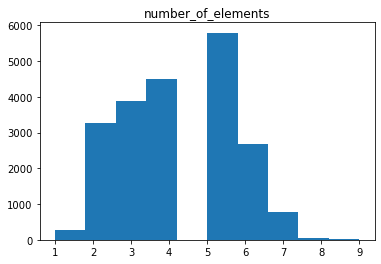

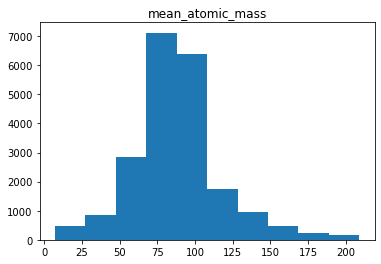

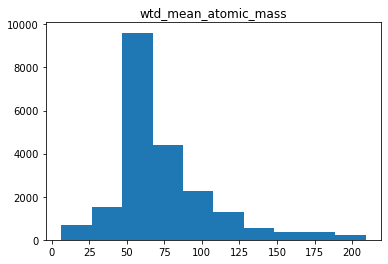

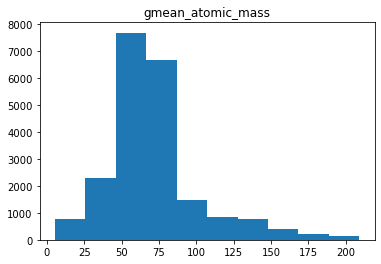

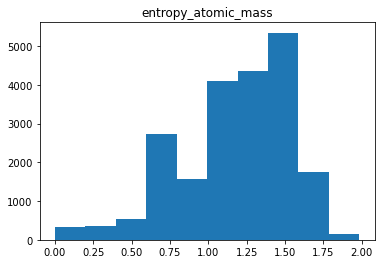

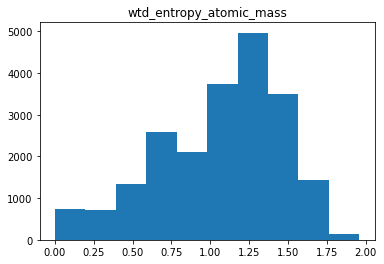

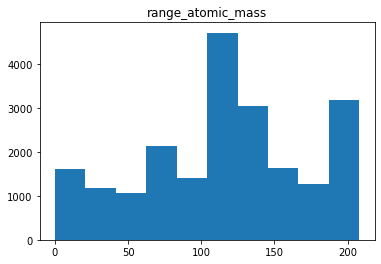

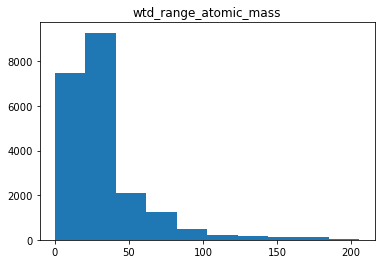

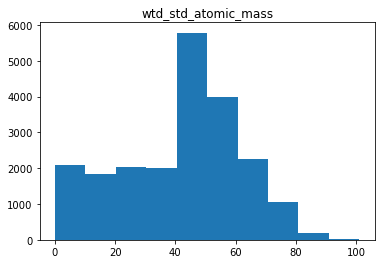

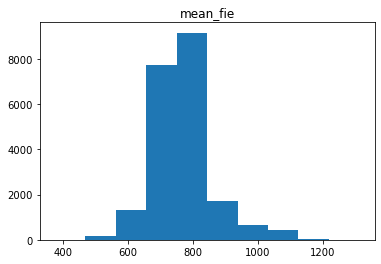

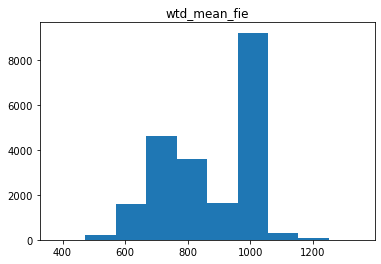

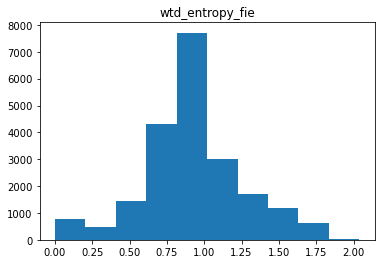

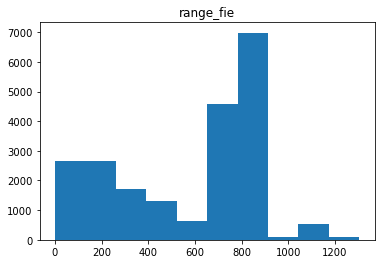

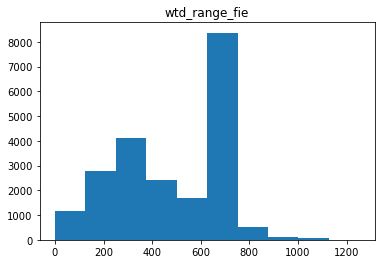

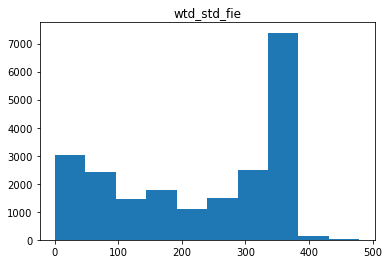

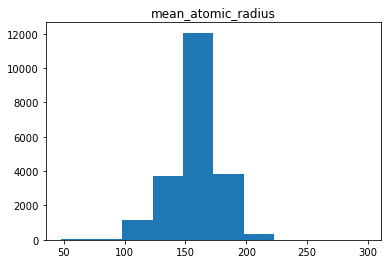

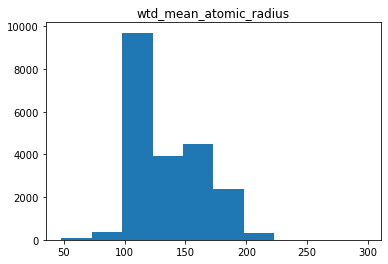

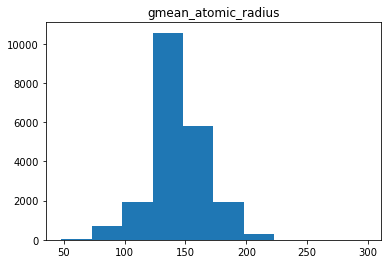

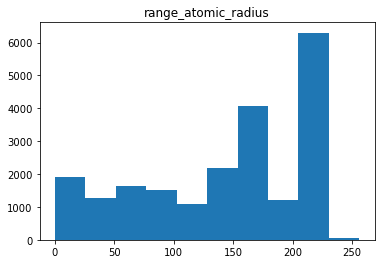

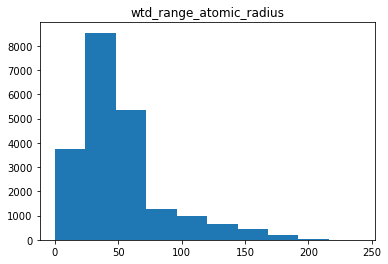

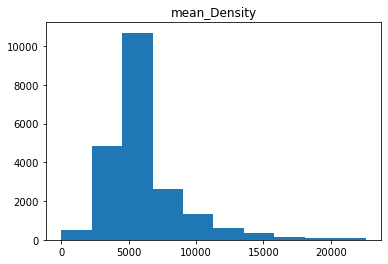

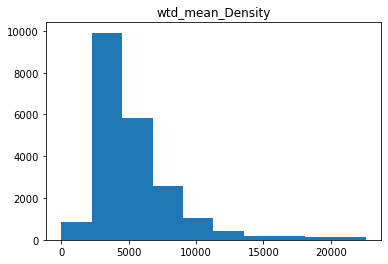

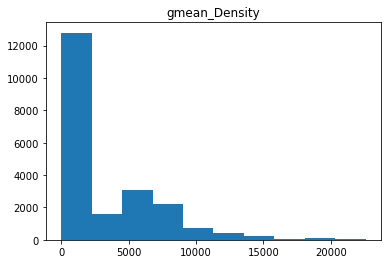

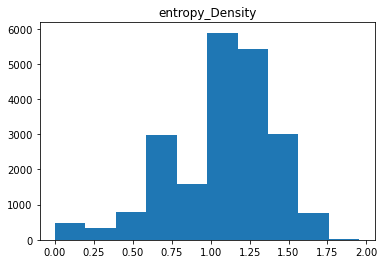

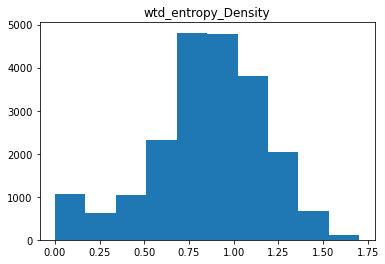

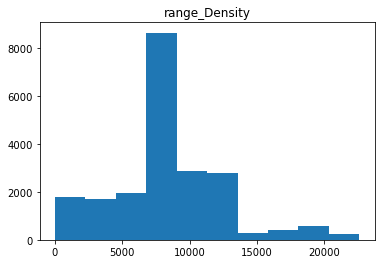

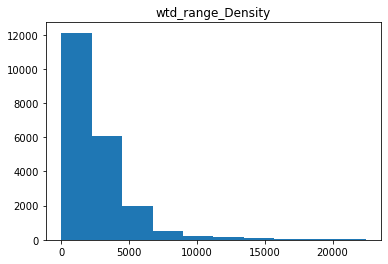

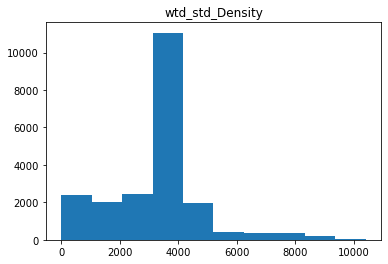

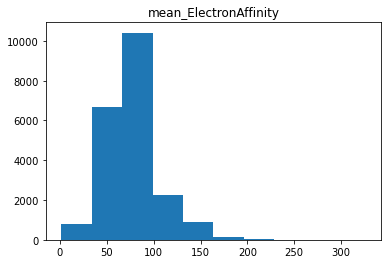

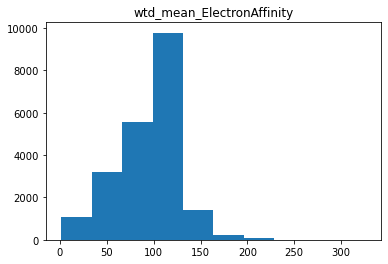

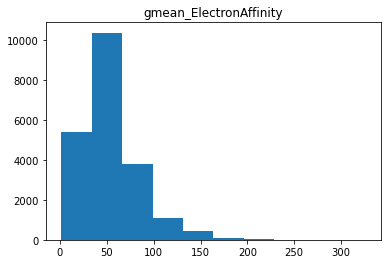

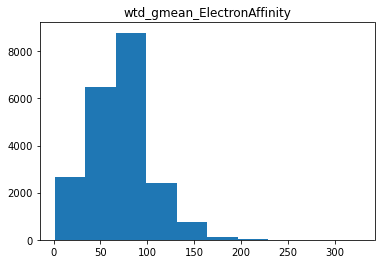

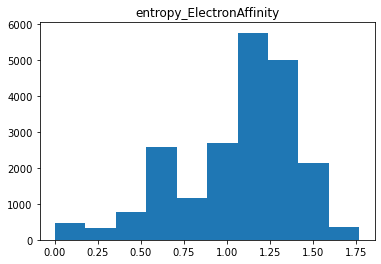

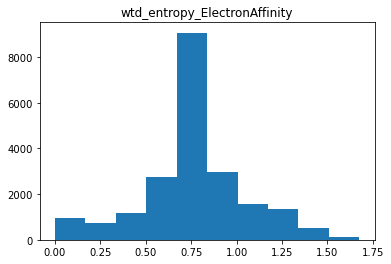

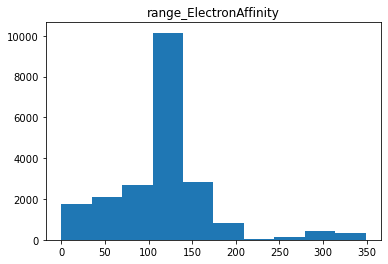

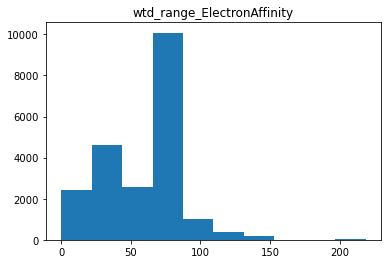

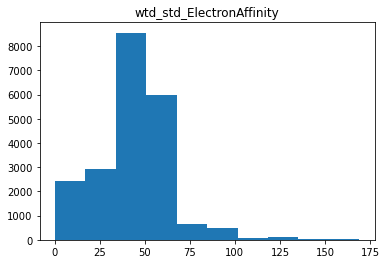

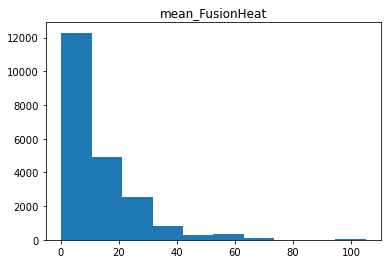

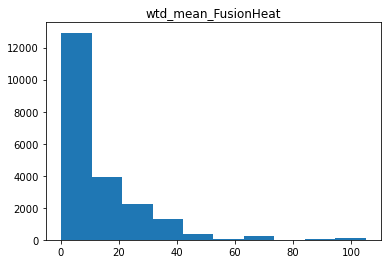

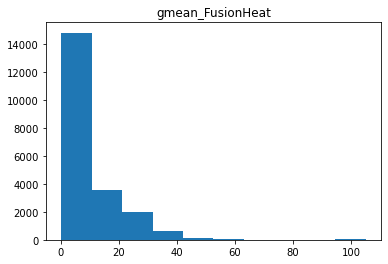

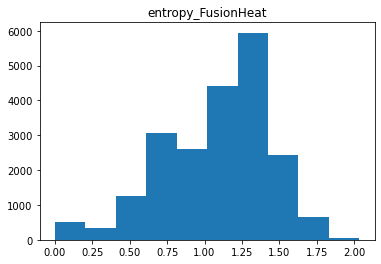

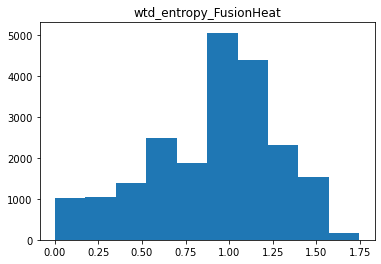

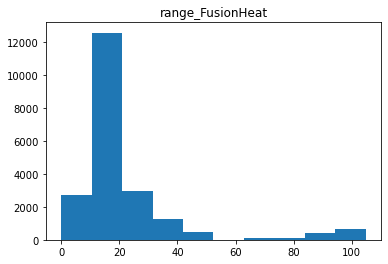

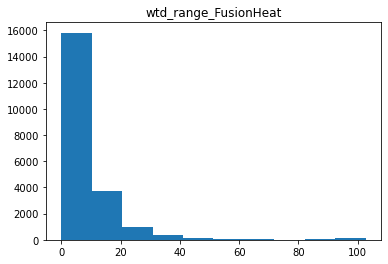

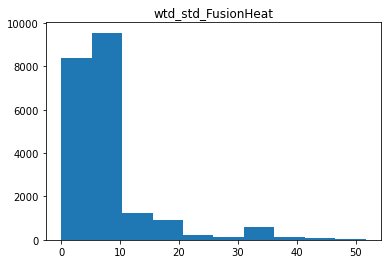

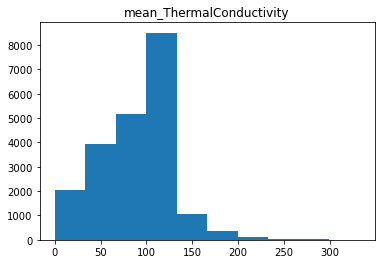

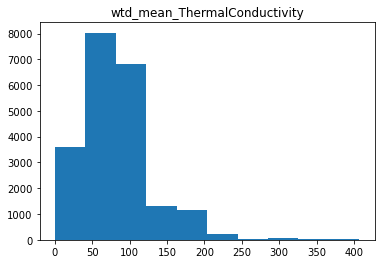

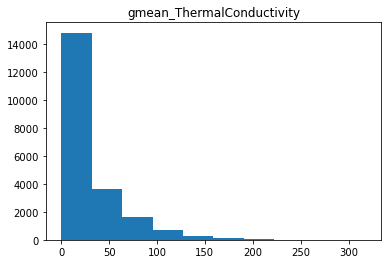

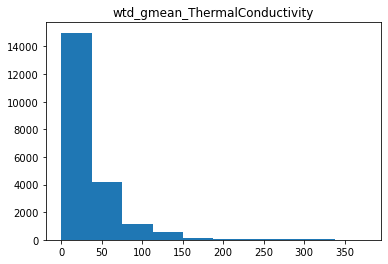

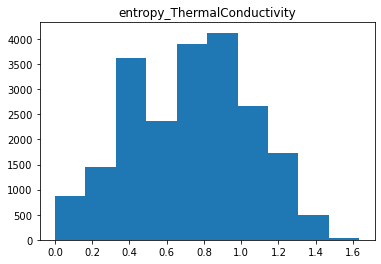

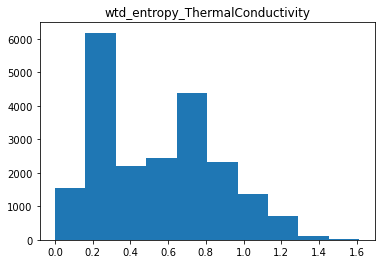

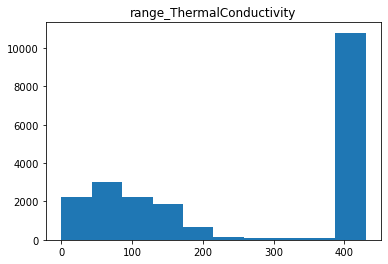

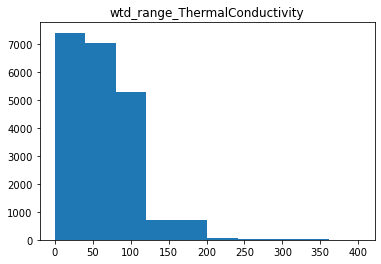

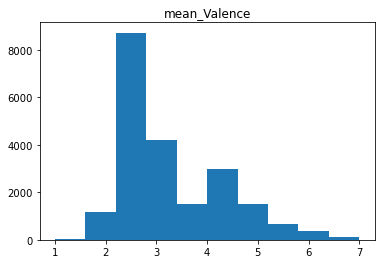

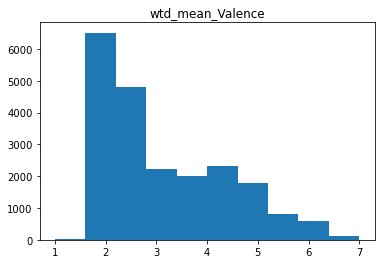

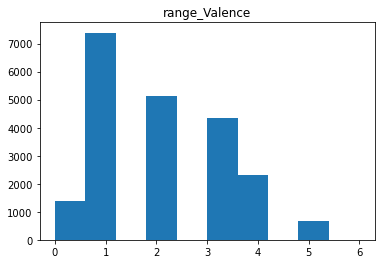

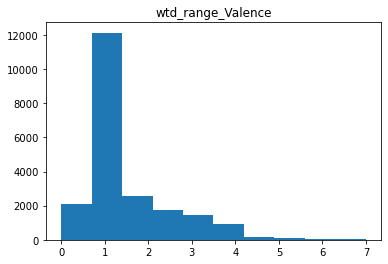

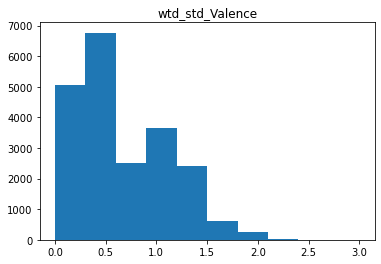

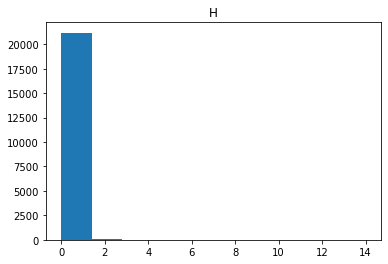

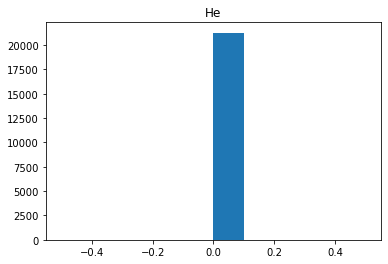

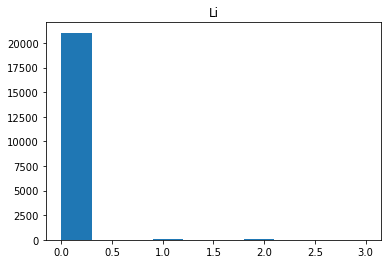

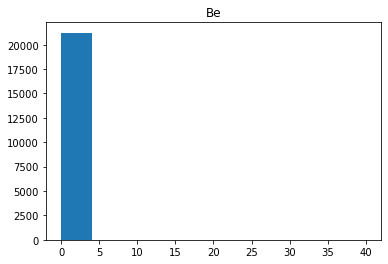

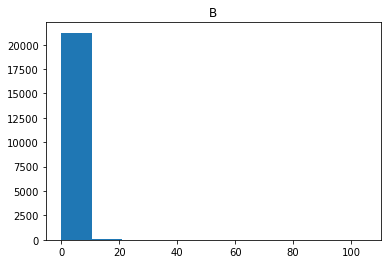

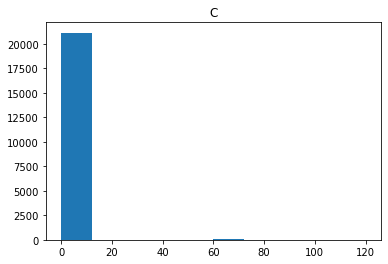

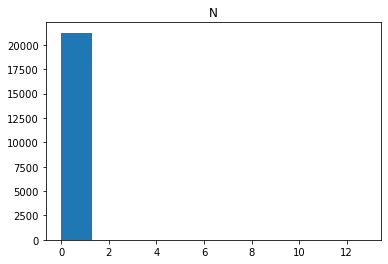

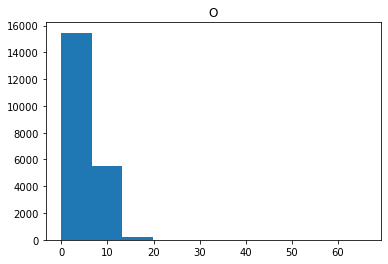

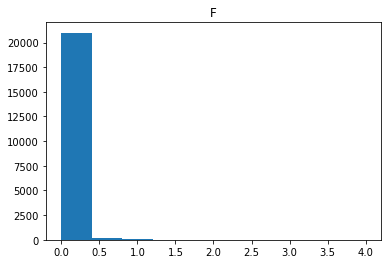

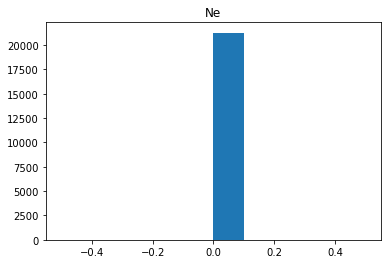

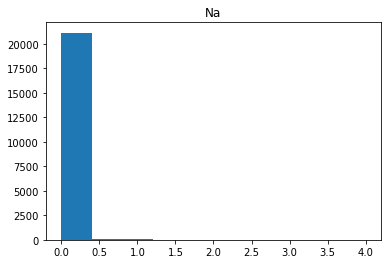

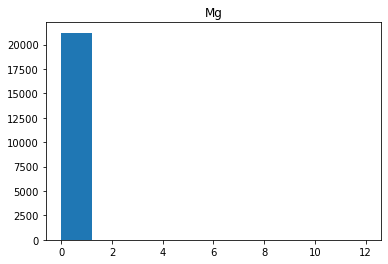

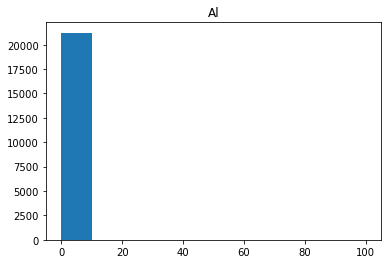

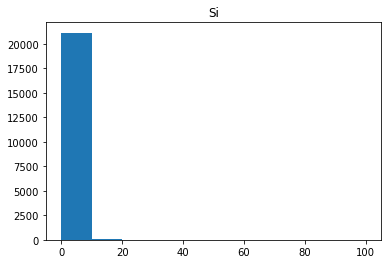

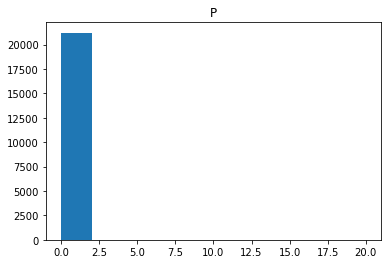

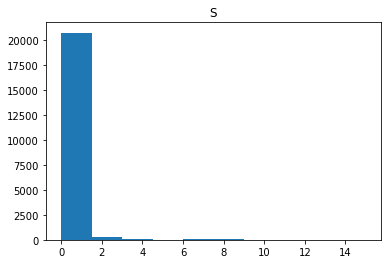

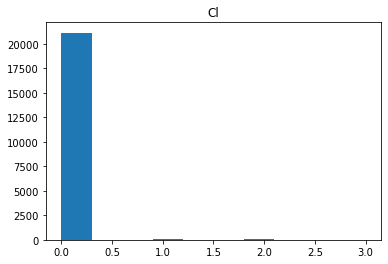

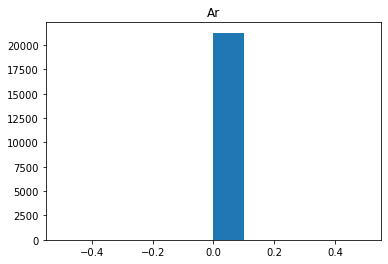

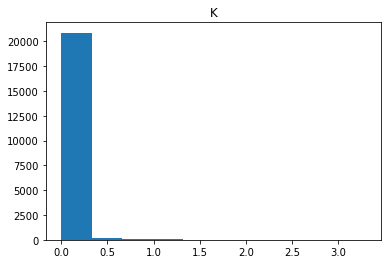

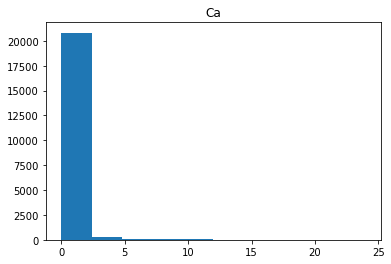

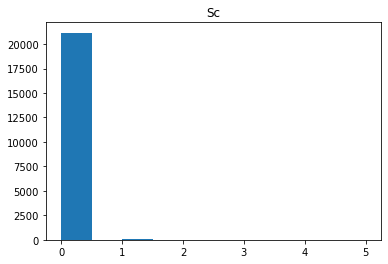

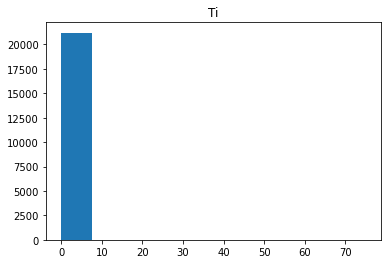

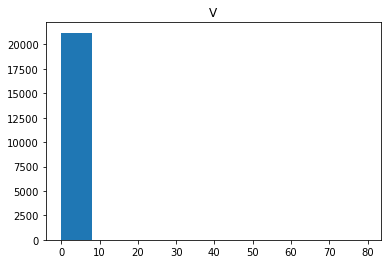

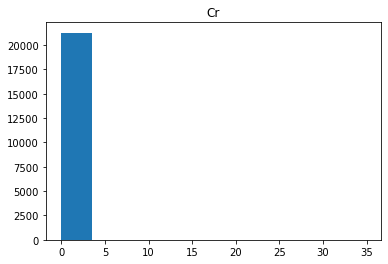

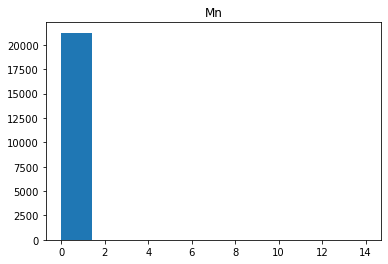

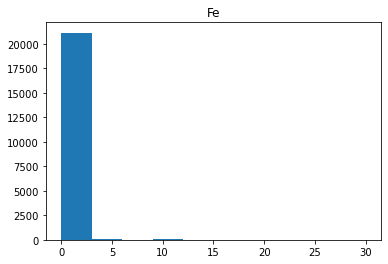

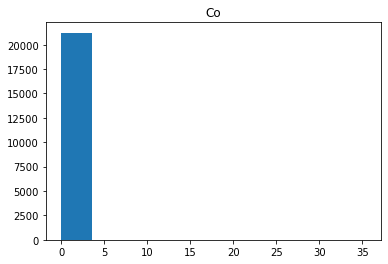

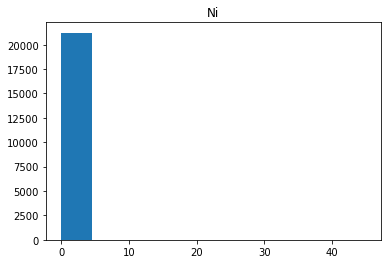

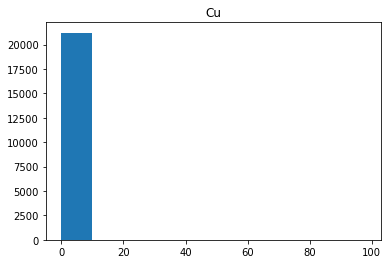

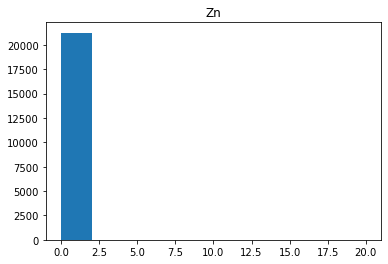

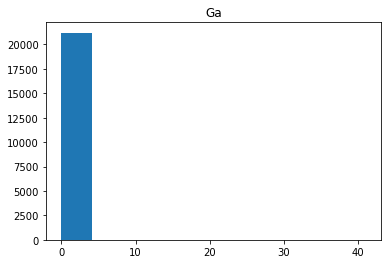

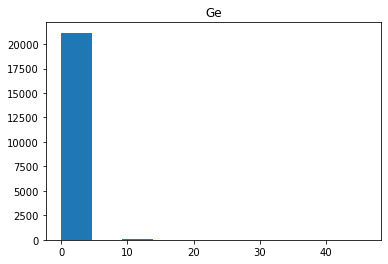

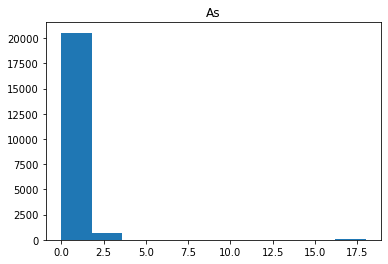

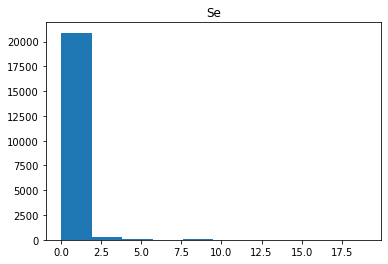

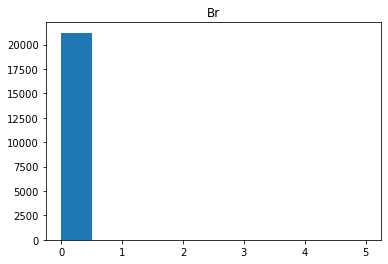

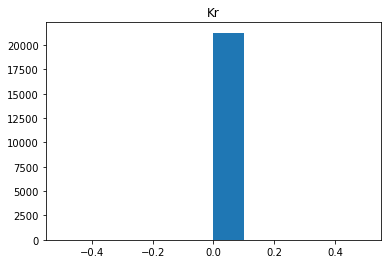

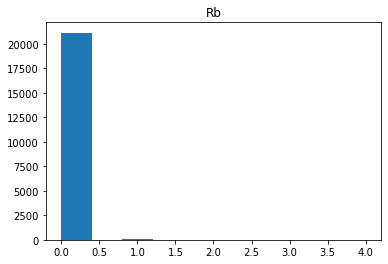

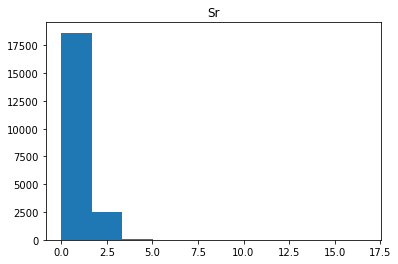

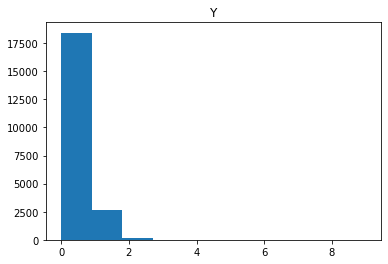

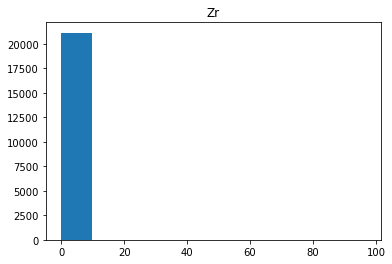

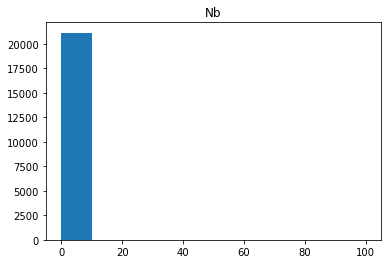

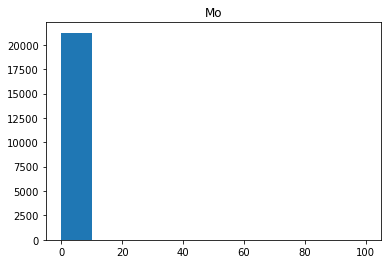

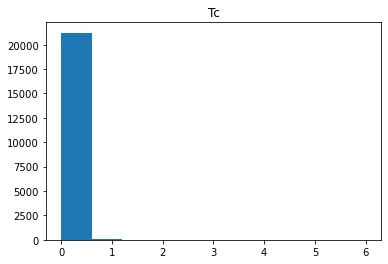

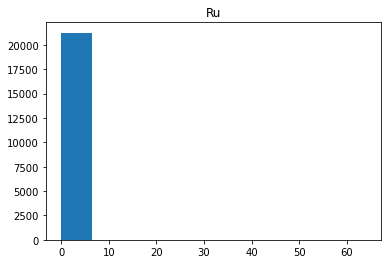

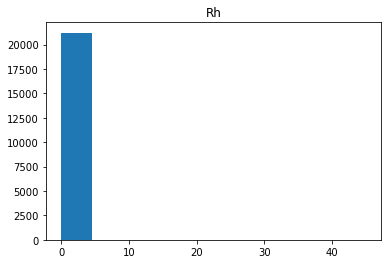

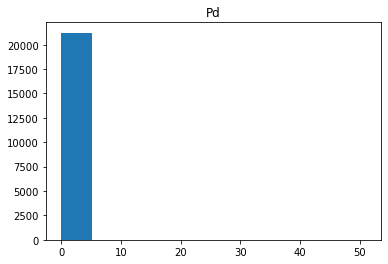

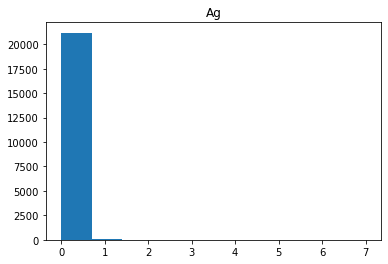

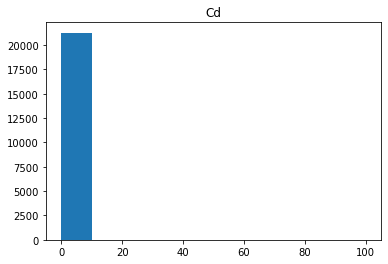

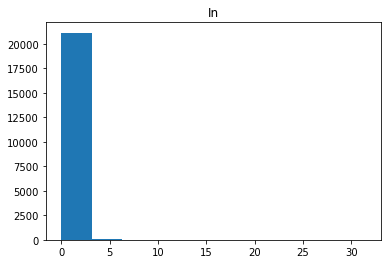

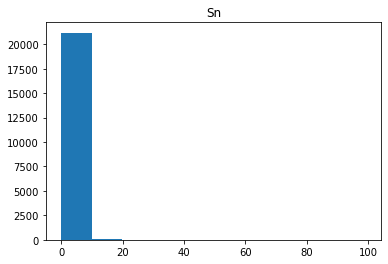

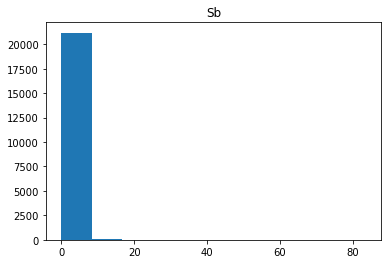

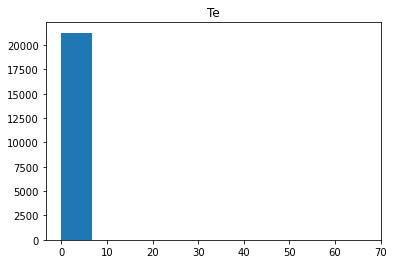

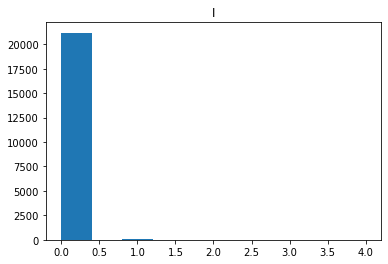

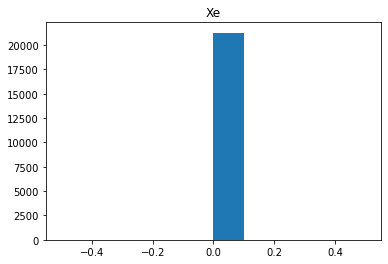

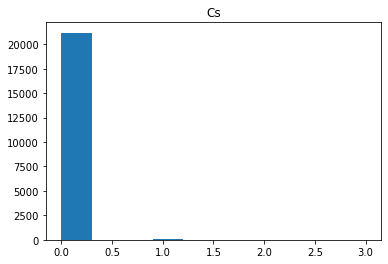

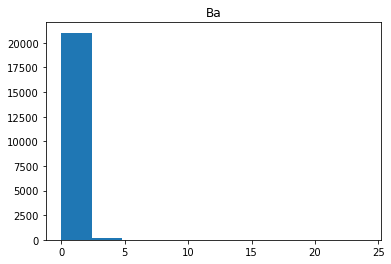

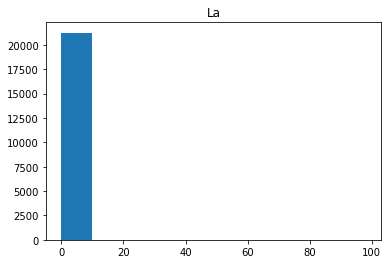

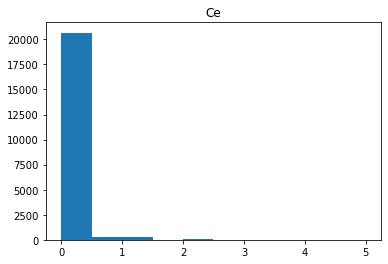

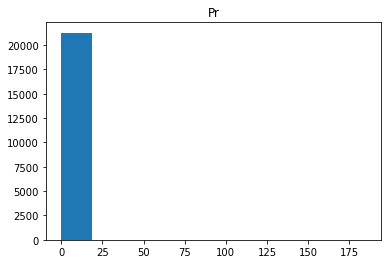

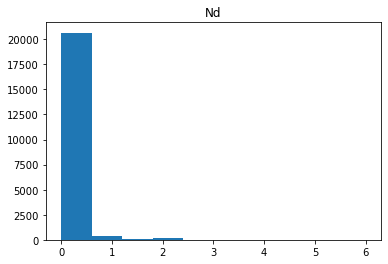

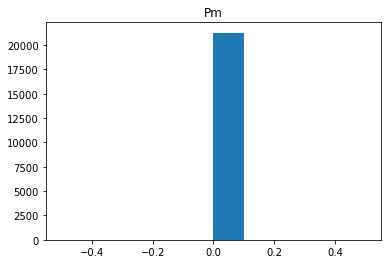

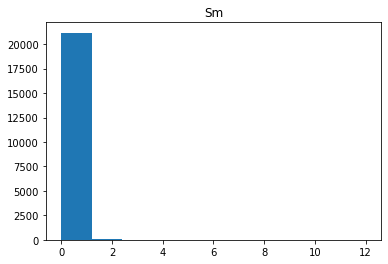

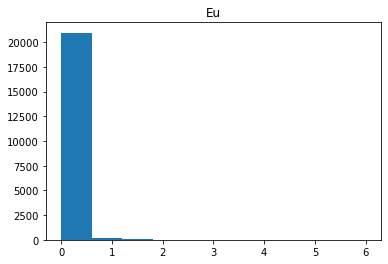

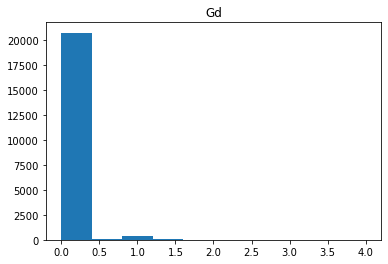

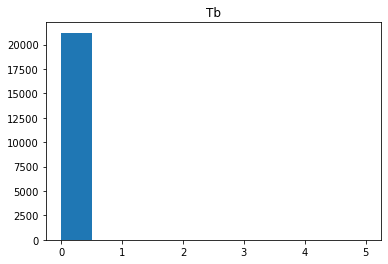

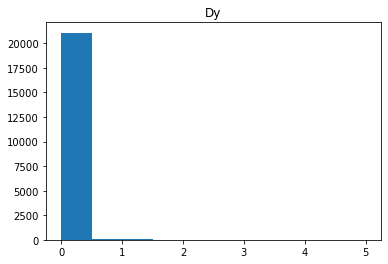

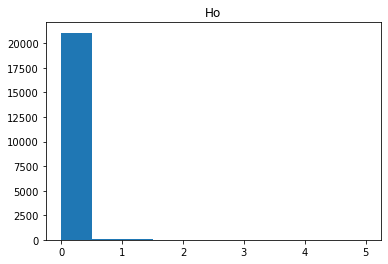

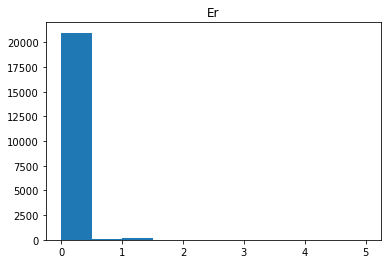

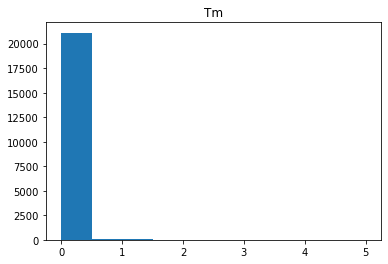

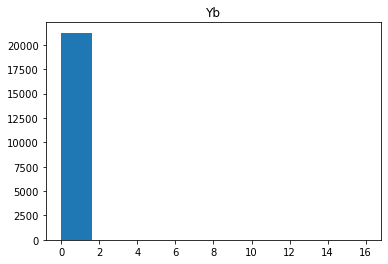

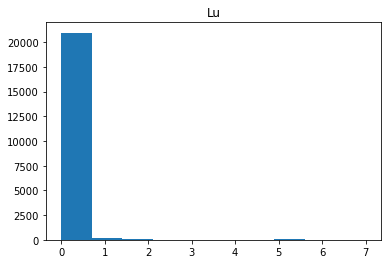

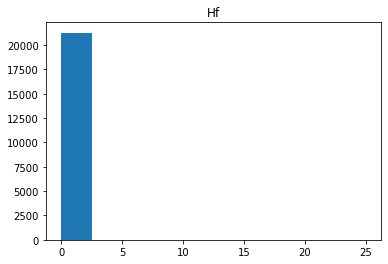

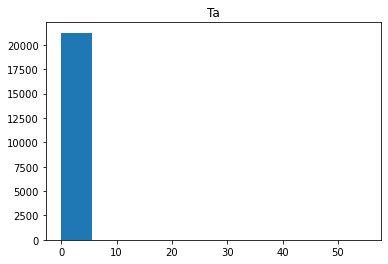

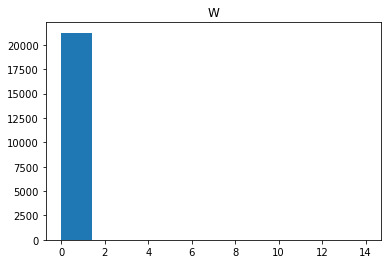

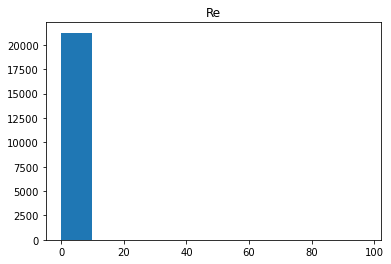

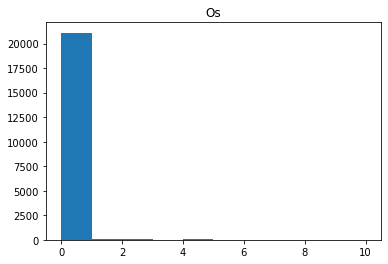

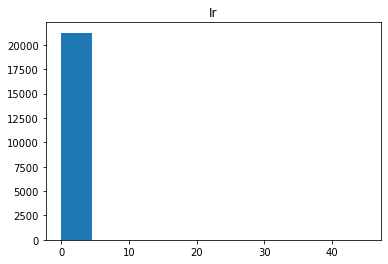

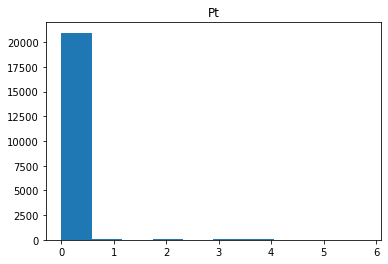

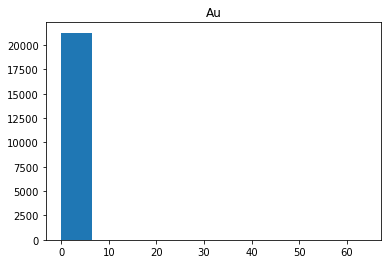

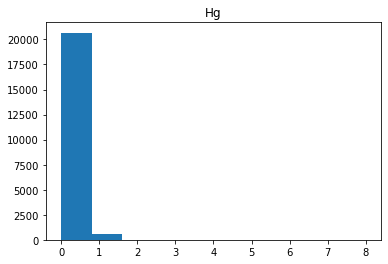

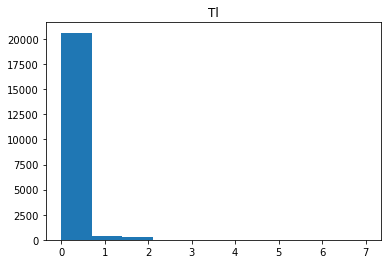

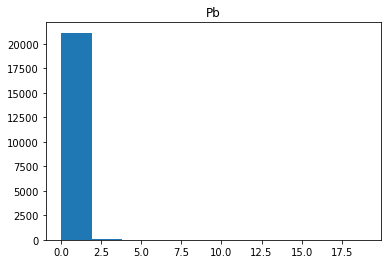

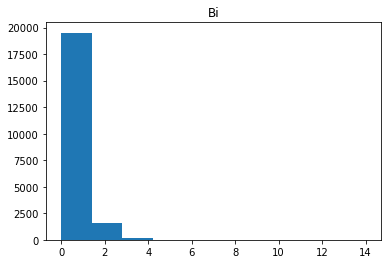

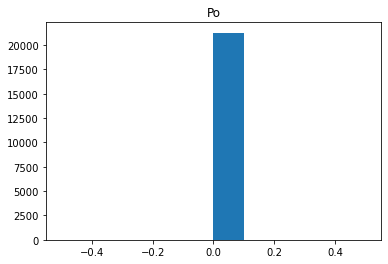

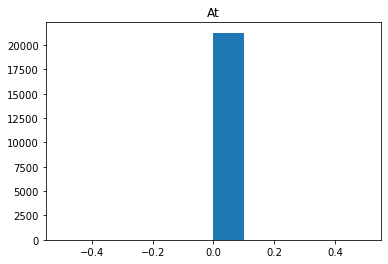

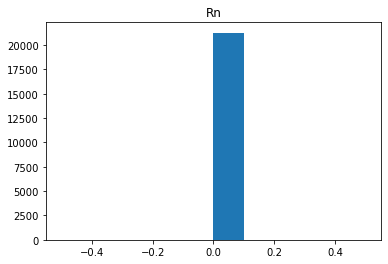

In [20]:
# Distirbution of Data
# import matplotlib.pyplot as plt
for i in X[:57].columns:
    plt.hist(superconduct[i])
    plt.title(i)
    plt.show()

<ipython-input-21-16a8c1a414f9>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


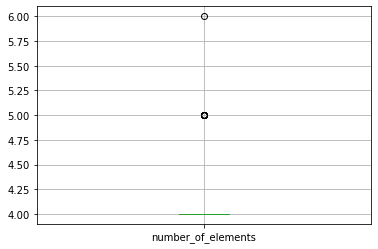

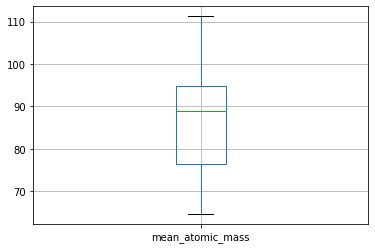

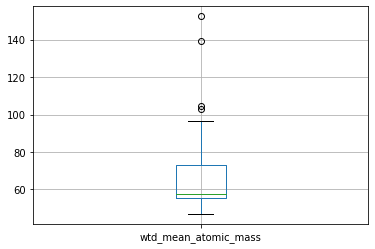

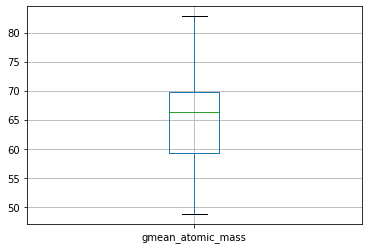

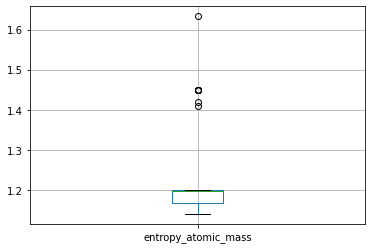

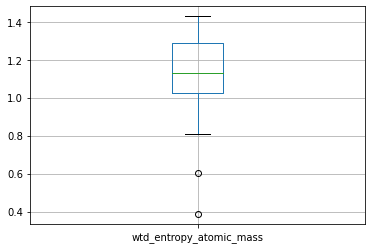

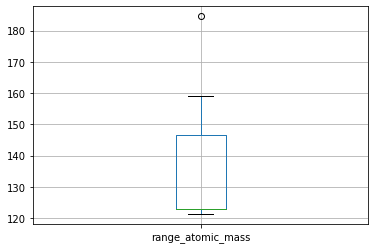

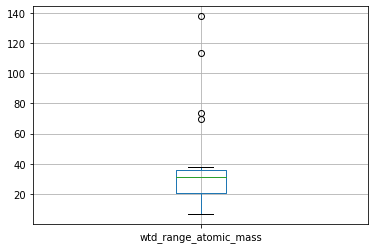

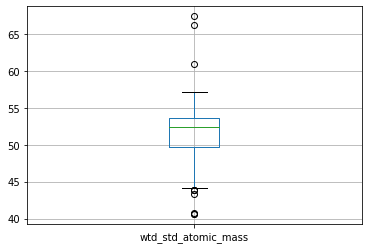

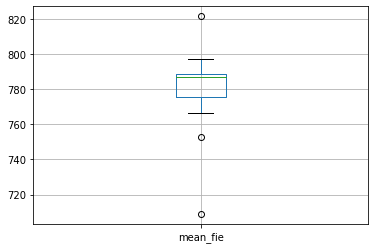

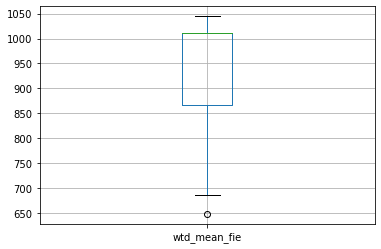

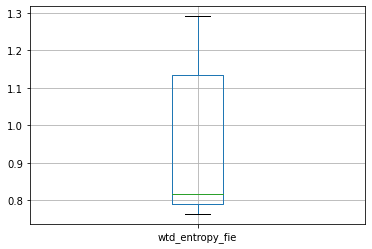

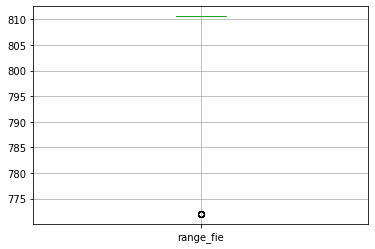

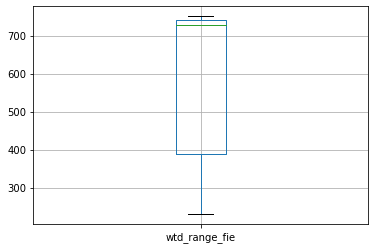

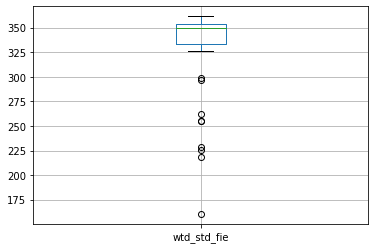

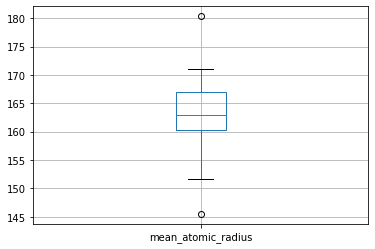

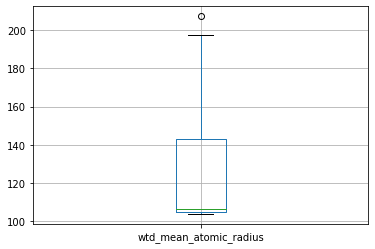

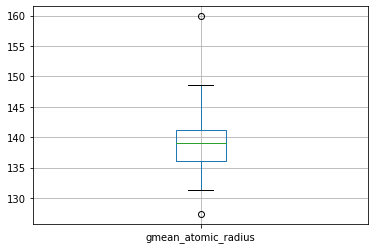

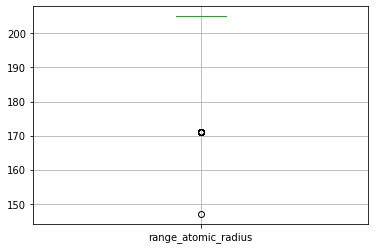

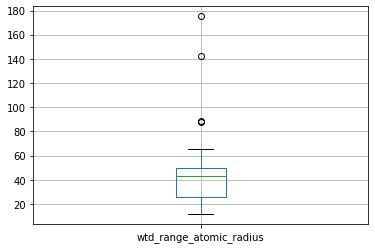

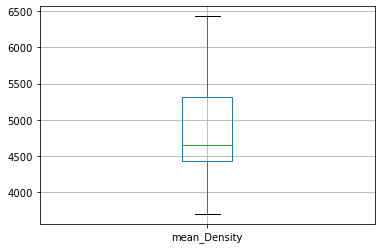

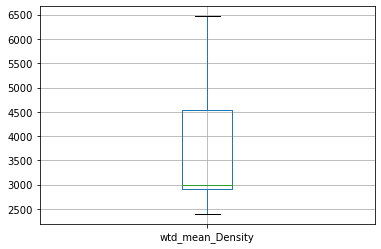

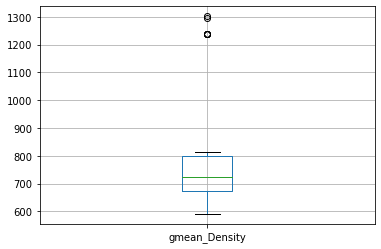

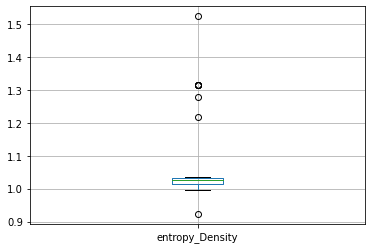

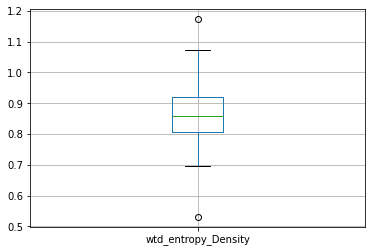

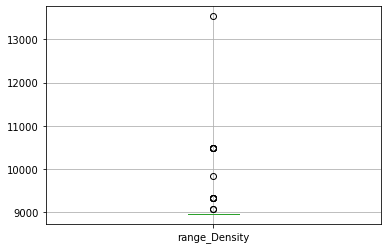

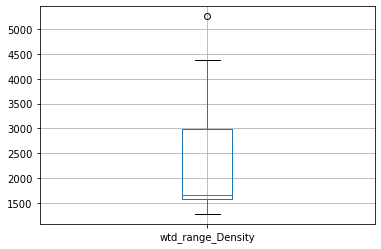

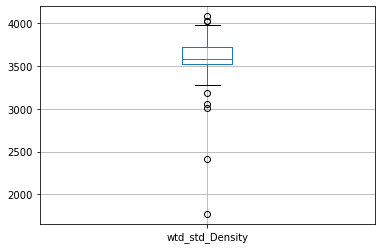

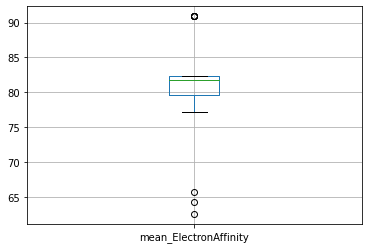

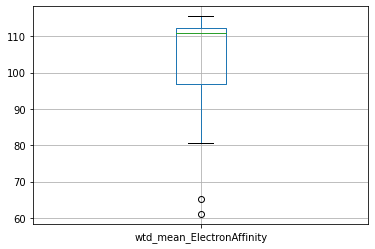

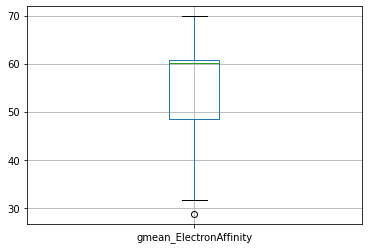

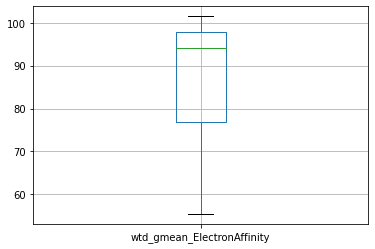

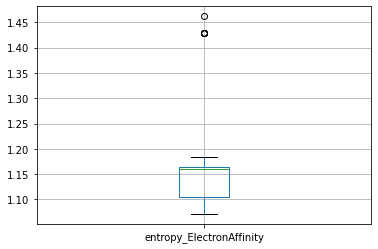

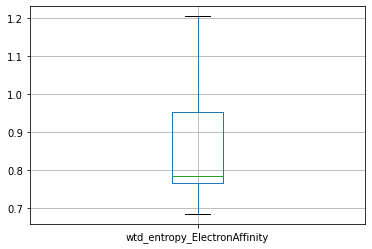

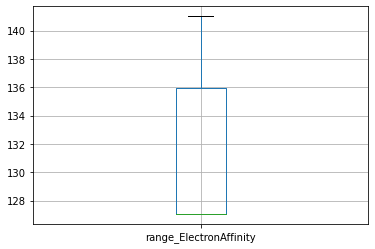

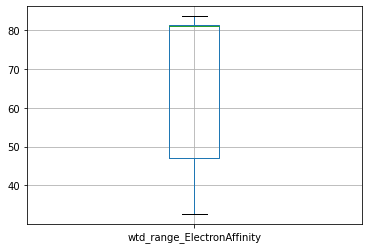

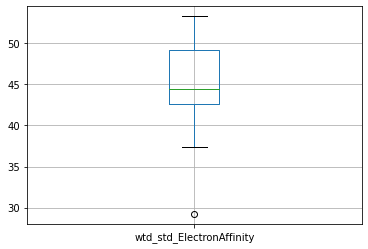

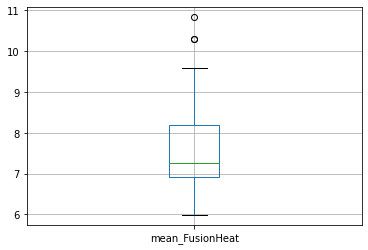

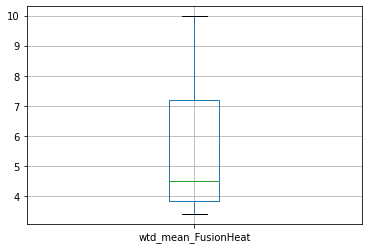

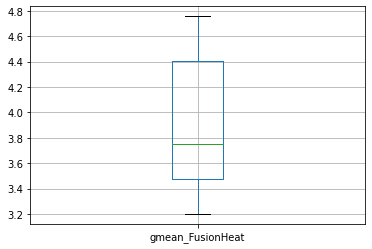

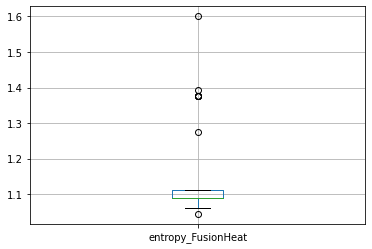

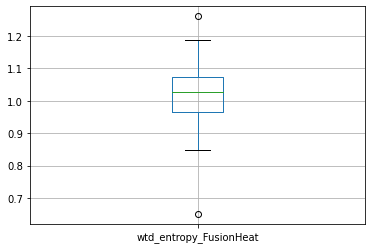

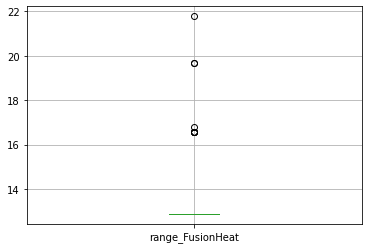

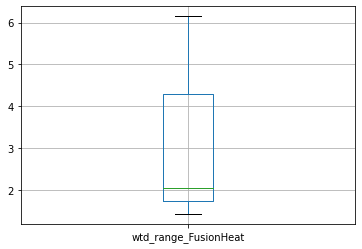

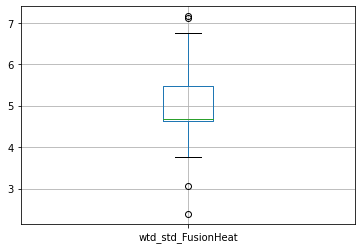

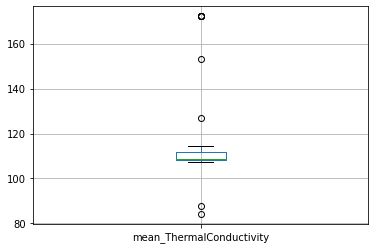

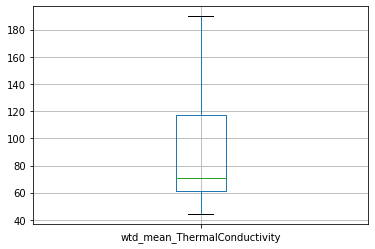

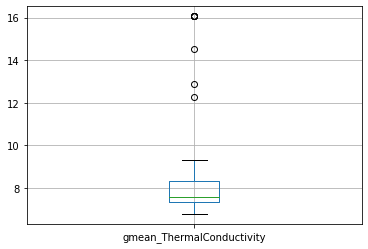

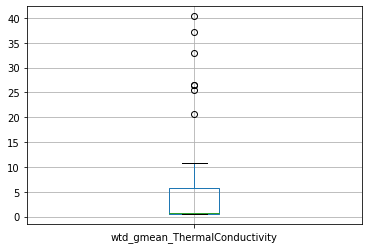

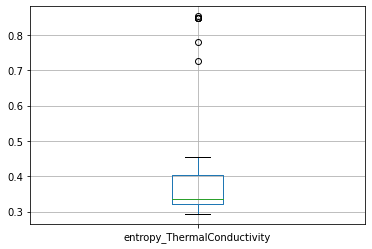

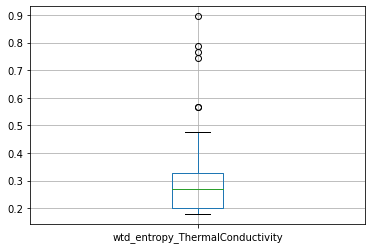

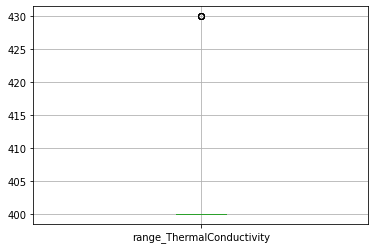

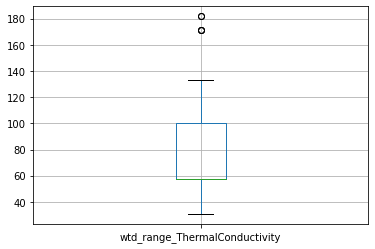

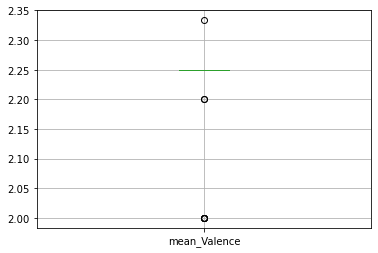

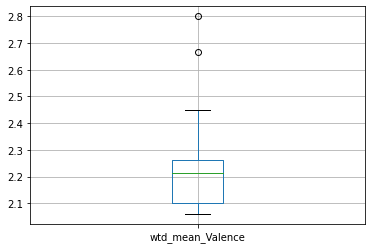

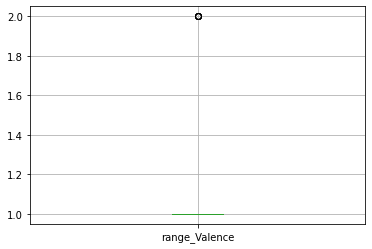

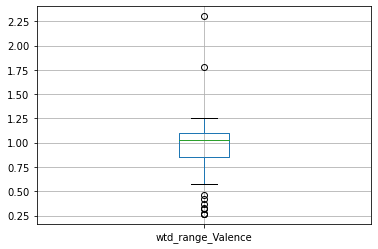

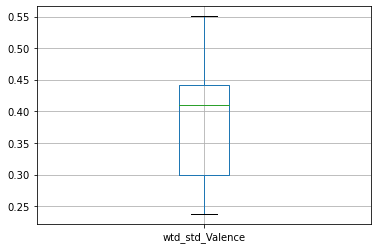

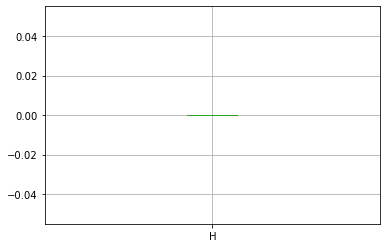

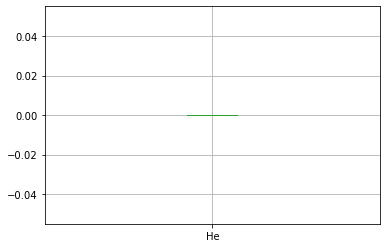

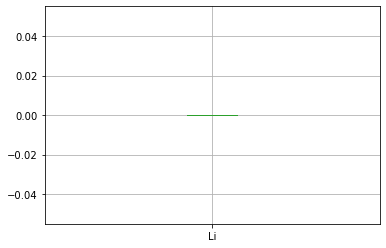

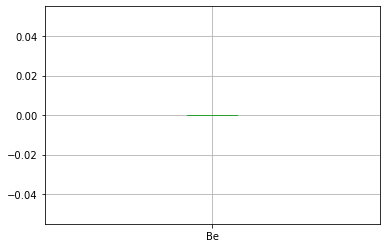

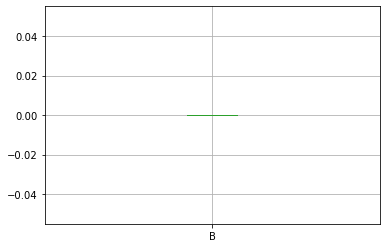

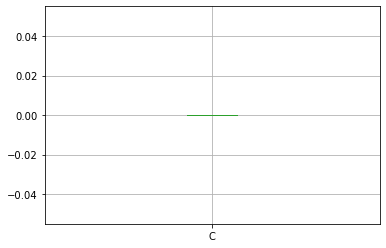

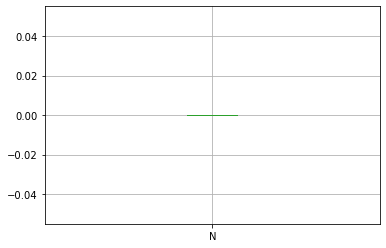

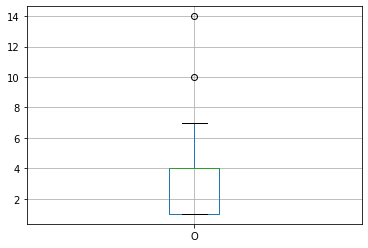

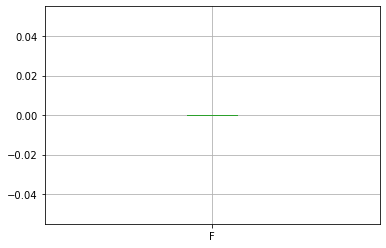

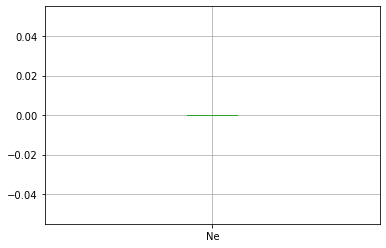

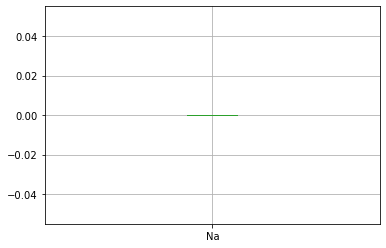

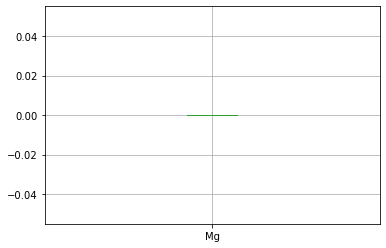

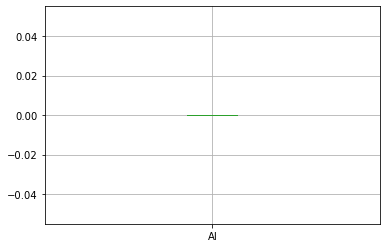

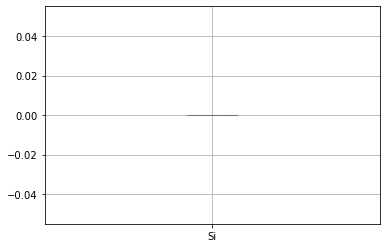

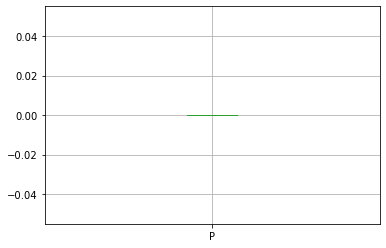

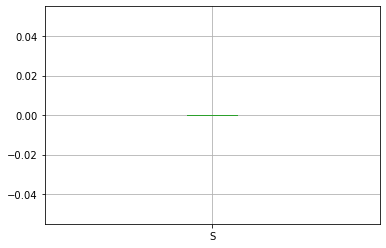

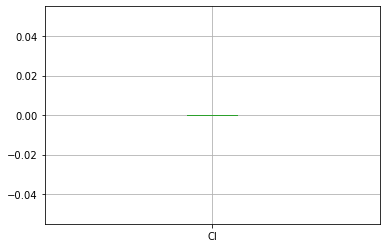

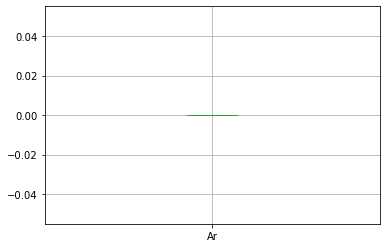

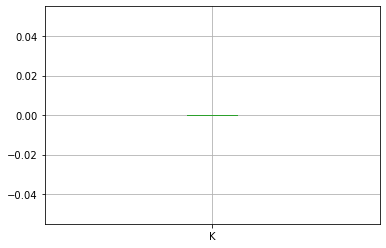

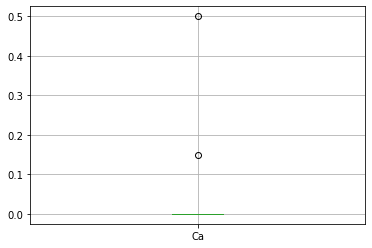

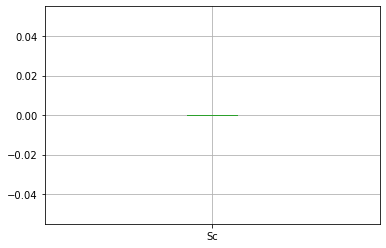

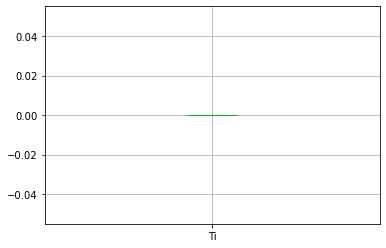

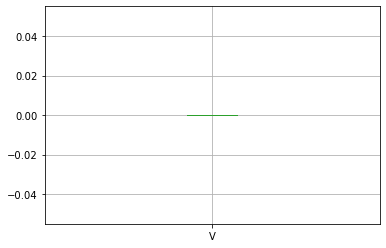

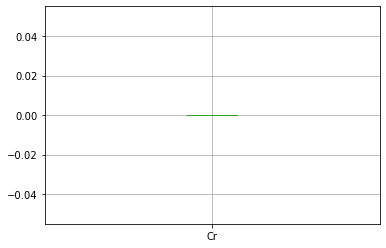

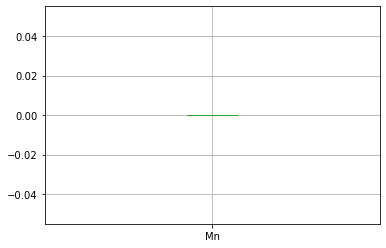

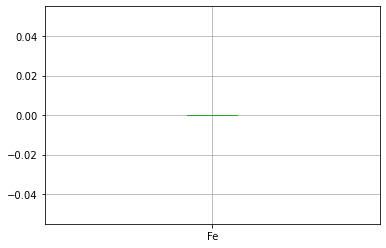

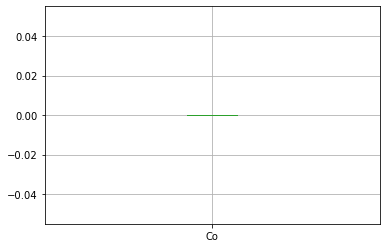

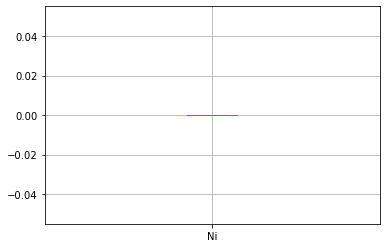

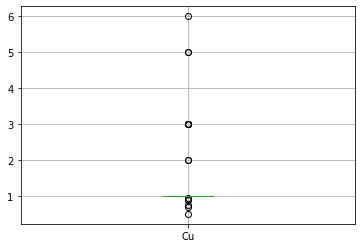

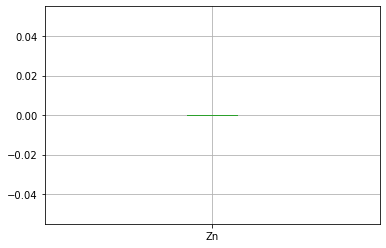

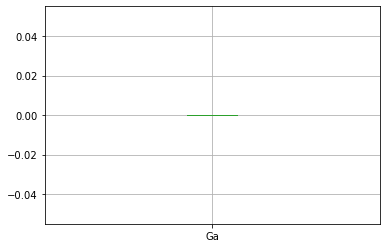

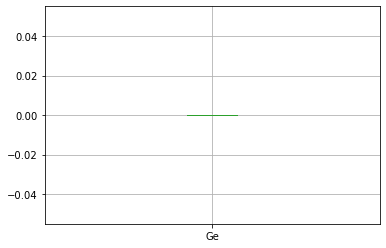

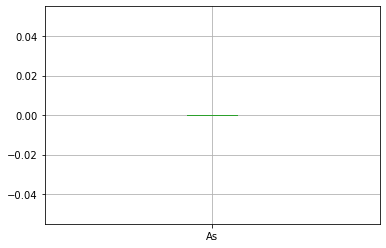

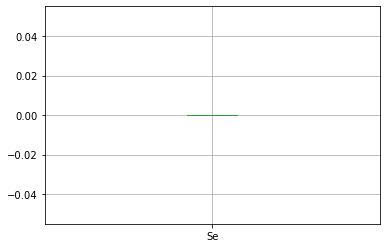

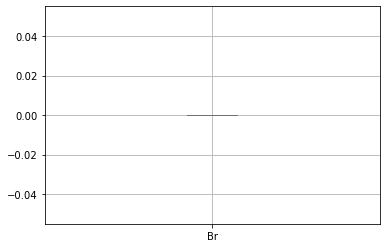

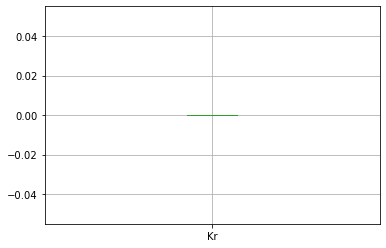

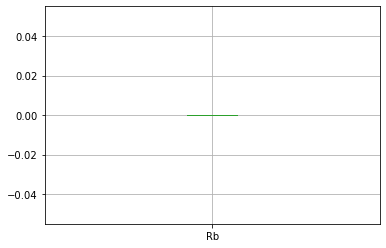

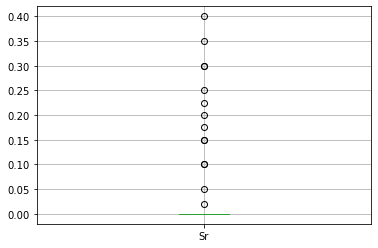

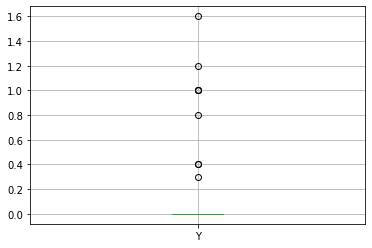

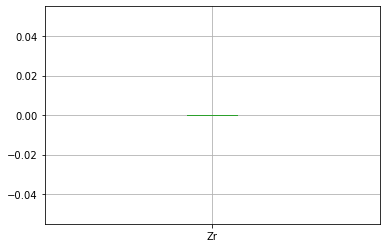

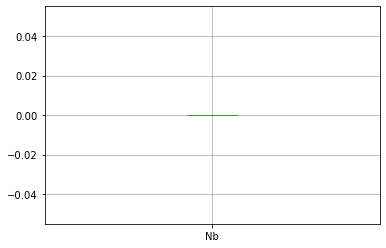

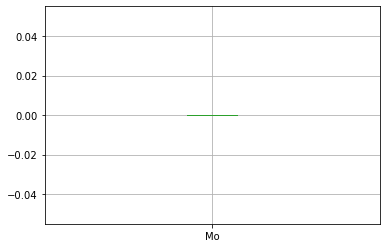

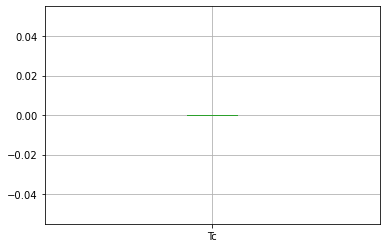

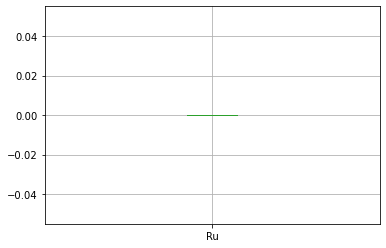

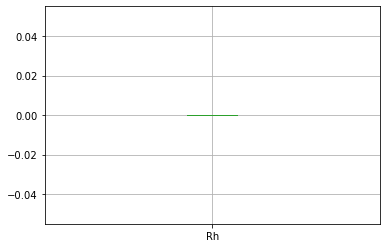

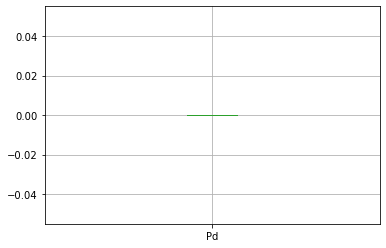

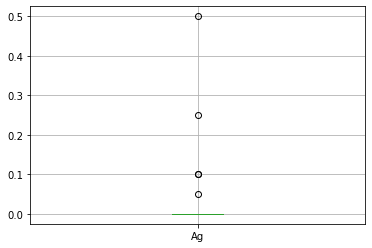

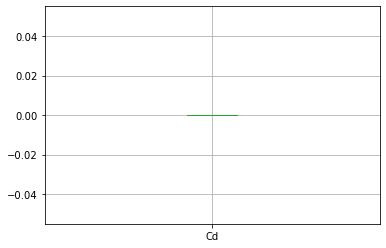

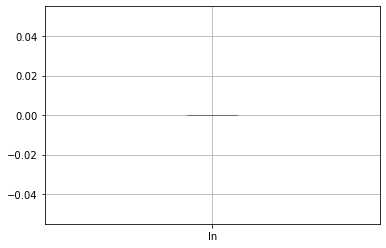

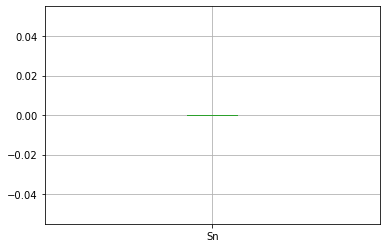

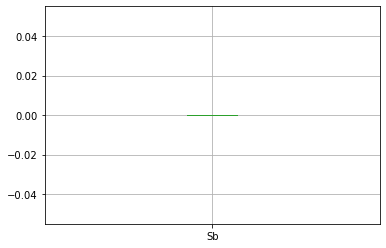

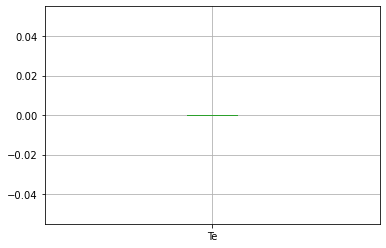

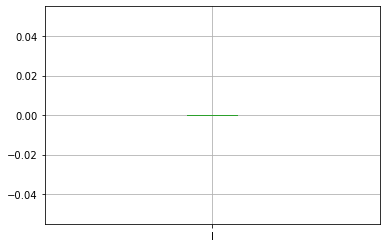

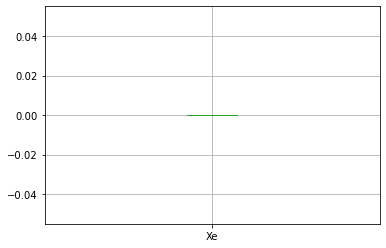

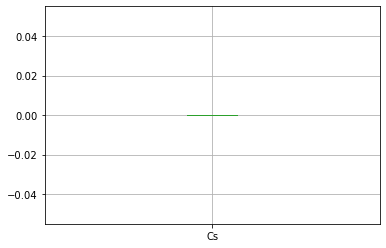

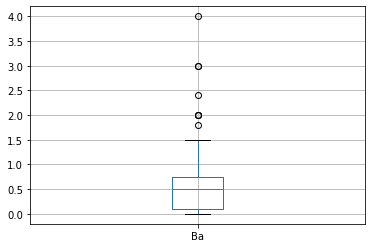

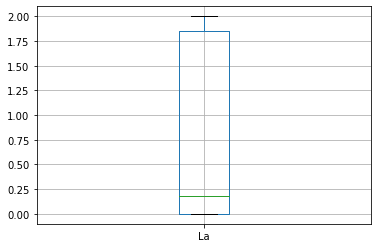

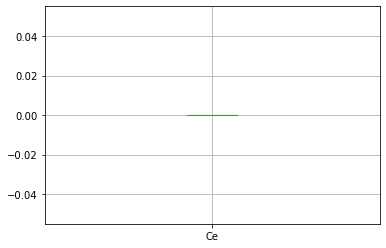

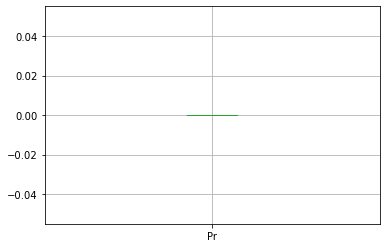

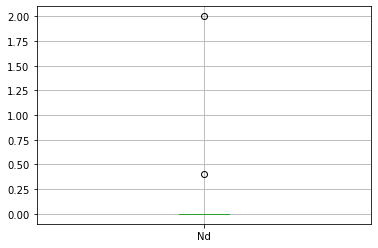

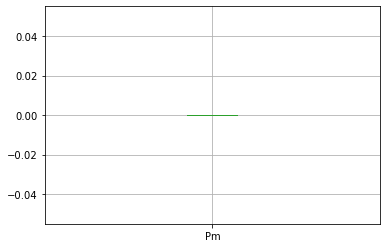

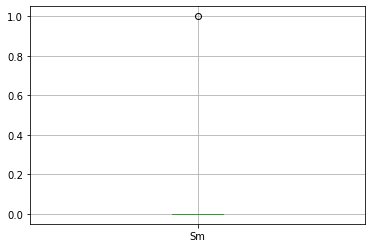

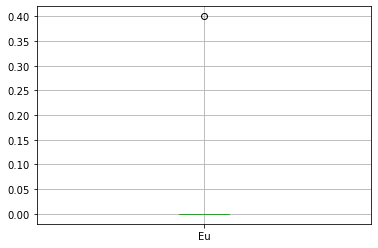

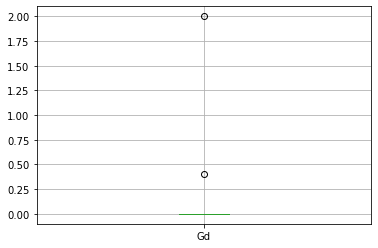

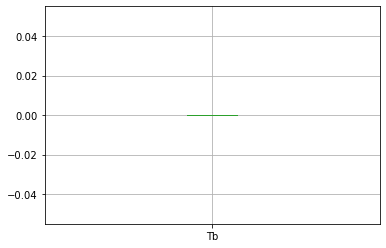

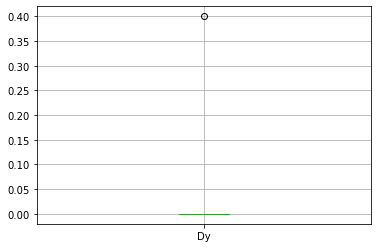

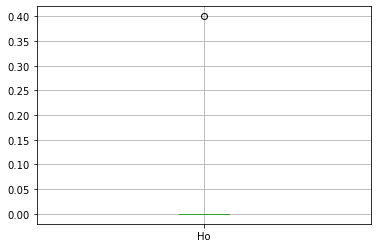

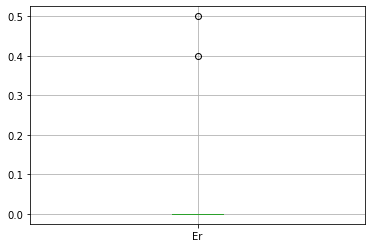

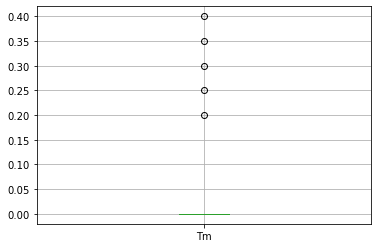

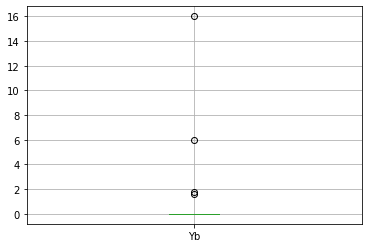

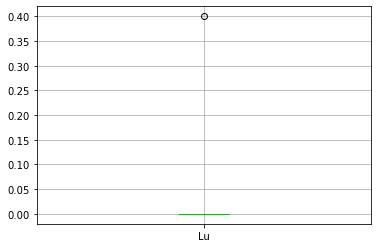

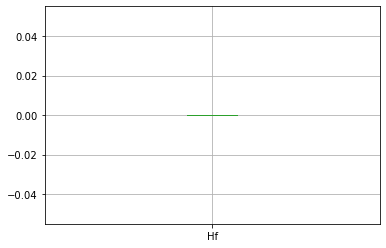

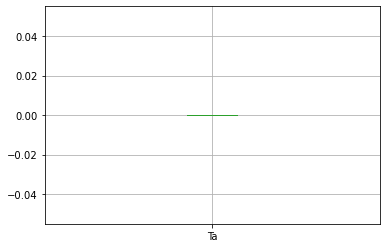

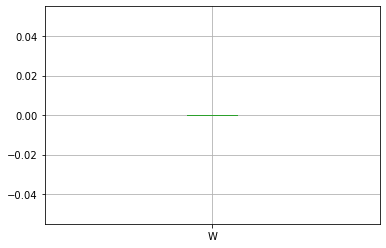

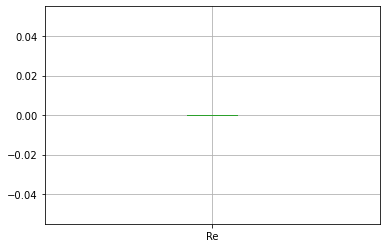

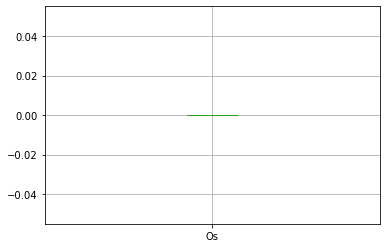

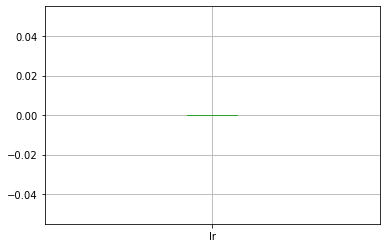

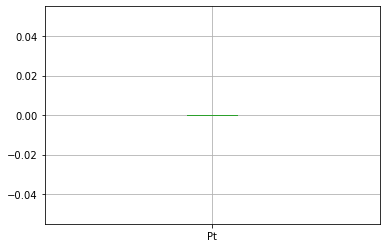

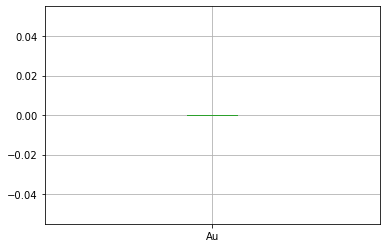

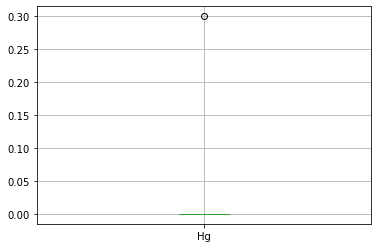

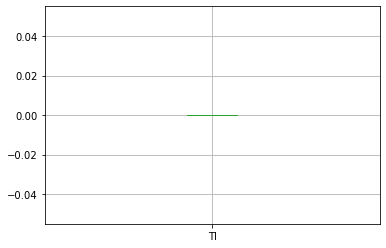

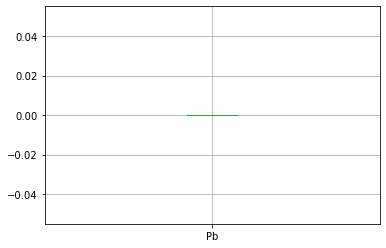

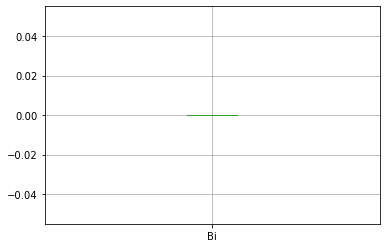

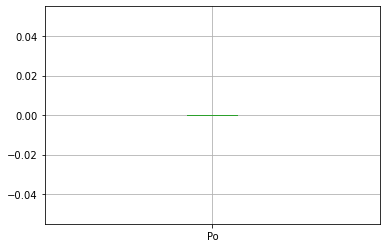

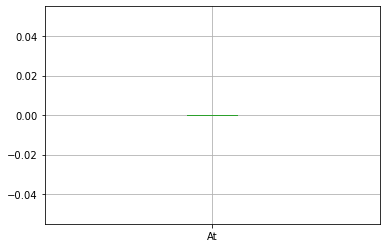

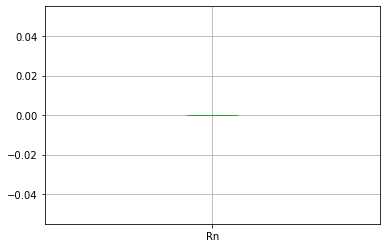

In [21]:
# Review Boxplots
sc_Col = X[:57].copy()

for column in sc_Col:
    plt.figure()
    sc_Col.boxplot([column])

In [22]:
# Scale Data - Remove Correlated
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=40)

In [23]:
# Scale Data - All Data
X_ALL = superconduct_DF.iloc[:,:-1]
y_ALL = superconduct_DF.iloc[:,-1]
X_scaled_ALL = scaler.fit_transform(X_ALL)
X_train_ALL, X_test_ALL, y_train_ALL, y_test_ALL = train_test_split(X_scaled_ALL, y, test_size=0.30, random_state=40)

In [24]:
X_train_ALL.shape
X_train.shape

(14884, 144)

# Lasso Feature Selection

In [25]:
# Feature Selection
from sklearn.linear_model import Lasso
split = KFold(shuffle=True)
lasso_SC = LassoCV(cv = split)
lasso_SC.fit(X_scaled, y)

LassoCV(cv=KFold(n_splits=5, random_state=None, shuffle=True))

In [26]:
feature_List = []
for i in range(len(X.columns)):
    feature_List.append({
        'name': X.columns[i],
        'coef': lasso_SC.coef_[i]
        })
    


In [27]:
features_SC = pd.DataFrame.from_dict(feature_List)
final_Features = features_SC.loc[features_SC["coef"]> 0,:]
final_Features.shape
final_Features

name       coef
5            wtd_entropy_atomic_mass   3.320452
6                  range_atomic_mass   5.723438
9                           mean_fie   1.656641
12                         range_fie   0.185702
18               range_atomic_radius   1.860679
26                 wtd_range_Density   0.370543
34            range_ElectronAffinity   0.086136
41            wtd_entropy_FusionHeat   1.396436
45          mean_ThermalConductivity   0.677022
46      wtd_mean_ThermalConductivity  12.482494
50   wtd_entropy_ThermalConductivity   2.224459
56                 wtd_range_Valence   0.539482
60                                Li   0.267277
63                                 C   0.167840
66                                 F   0.121656
76                                 K   0.048357
77                                Ca   2.429865
80                                 V   0.146344
94                                Rb   0.272148
95                                Sr   0.623551
98                                Nb   0.339665
100                               Tc   0.012936
113                               Ba   8.748704
127                               Yb   0.050719
128                               Lu   0.197431
137                               Hg   1.502729
138                               Tl   1.129270
140                               Bi   3.899519

In [28]:
final_Features.sort_values(by='coef', ascending=False,inplace=True)

alt.Chart(final_Features).mark_bar().encode(
    x=alt.X('name',sort=alt.SortField(field='coef', order='descending'), axis=alt.Axis(title='Feature Names')),
    y=alt.Y('coef', axis=alt.Axis(title='Coeficient',))
).interactive().properties(
    width = 500,
    height = 300,
    title = "L1 Important Features and Valuers",)




/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


alt.Chart(...)

In [29]:
important_Features_X = X[final_Features['name'].values]
important_Features_X.shape
important_Features_X.columns



Index(['wtd_mean_ThermalConductivity', 'Ba', 'range_atomic_mass', 'Bi',
       'wtd_entropy_atomic_mass', 'Ca', 'wtd_entropy_ThermalConductivity',
       'range_atomic_radius', 'mean_fie', 'Hg', 'wtd_entropy_FusionHeat', 'Tl',
       'mean_ThermalConductivity', 'Sr', 'wtd_range_Valence',
       'wtd_range_Density', 'Nb', 'Rb', 'Li', 'Lu', 'range_fie', 'C', 'V', 'F',
       'range_ElectronAffinity', 'Yb', 'K', 'Tc'],
      dtype='object')

# Model Development

In [30]:
# The following at the datasets in use
X_ALL.shape # All Features
X_scaled.shape # All Features minus Hihgly Coorelation
important_Features_X.shape # Important Features from Lasso

X_ALL.shape[1]
X_scaled.shape[1] # All Features minus Hihgly Coorelation
important_Features_X.shape[1] # Important Features from Lasso

shape_List = [X_ALL.shape,X_scaled.shape, important_Features_X.shape ]
shape_DF = pd.DataFrame(shape_List)

shape_DF.insert(0, "Name", ["All Data", "Reduced Data", "L1 Feature Data"])

shape_DF = shape_DF.rename(columns = {
                                1: 'Features', 
                                0: 'Rows',                             
                                }, inplace=False).reset_index(drop=True)


shape_DF.style.hide_index()



In [31]:
master_Scores = []

In [32]:
# Printing Equation
#https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

# Model - Linear Regression

## Linear Regression - All Features

In [33]:
print("Model - Linear Regression - All Features")
linear_Model_All = LinearRegression()
linear_Model_All.fit(X_ALL,y)
# linear_Model.coef_
linear_All_R2 =  linear_Model_All.score(X_ALL, y) # R2
print("R2", linear_All_R2) # R2
linear_All_MSE = cross_val_score(linear_Model_All, X_ALL, y, cv=split, scoring='neg_mean_squared_error').mean()
print("Mean Square Error", linear_All_MSE)
# for i in range(len(X.columns)):
#     print(X.columns[i], linear_Model.coef_[i])

master_Scores.append({
                    'Name': 'Linear_Model_All',
                    'R2': linear_All_R2,
                    'MSE': linear_All_MSE,
                      })

Model - Linear Regression - All Features
R2 0.7646191632540856
Mean Square Error -701.2057312072099


## Linear Regression - Reduced Features

In [34]:
print("Model - Linear Regression - Reduced Features")
linear_Model_Reduced = LinearRegression()
linear_Model_Reduced.fit(X_scaled,y)
# linear_Model.coef_
linear_Reduced_R2 =  linear_Model_Reduced.score(X_scaled, y) # R2
print("R2", linear_Reduced_R2) # R2
linear_Reduced_MSE = cross_val_score(linear_Model_Reduced, X_scaled, y, cv=split, scoring='neg_mean_squared_error').mean()
print("Mean Square Error", linear_Reduced_MSE)
# for i in range(len(X.columns)):
#     print(X.columns[i], linear_Model.coef_[i])

master_Scores.append({
                    'Name': 'linear_Model_Reduced',
                    'R2': linear_Reduced_R2,
                    'MSE': linear_Reduced_MSE,
                      })

Model - Linear Regression - Reduced Features
R2 0.7501733348929254
Mean Square Error -610.5795345340292


## Linear Regression - Important Features

In [35]:
print("Model - Linear Regression - Reduced Features")
linear_Model_Important = LinearRegression()
linear_Model_Important.fit(X_scaled,y)
# linear_Model.coef_
linear_Important_R2 =  linear_Model_Important.score(X_scaled, y) # R2
print("R2", linear_Important_R2) # R2
linear_Important_MSE = cross_val_score(linear_Model_Important, X_scaled, y, cv=split, scoring='neg_mean_squared_error').mean()
print("Mean Square Error", linear_Important_MSE)
# for i in range(len(X.columns)):
#     print(X.columns[i], linear_Model.coef_[i])

master_Scores.append({
                    'Name': 'linear_Model_Important',
                    'R2': linear_Important_R2,
                    'MSE': linear_Important_MSE,
                      })

Model - Linear Regression - Reduced Features
R2 0.7501733348929254
Mean Square Error -569.7203701220824


# Model L2 Ridge

## Model - L2 Ridge - ALL Features 

In [36]:
print("Model - L2 Ridge - ALL Features")
L2_Model_All = RidgeCV().fit(X_scaled_ALL, y_ALL) # R2
L2_Model_All_R2 = L2_Model_All.score(X_scaled_ALL, y_ALL)
print("R2", L2_Model_All_R2)
L2_Model_All_MSE =  cross_val_score(L2_Model_All, X_scaled_ALL, y_ALL, cv=split, scoring='neg_mean_squared_error').mean()
print("Mean Square Error", L2_Model_All_MSE)

master_Scores.append({
                    'Name': 'L2_Model_All',
                    'R2': L2_Model_All_R2,
                    'MSE': L2_Model_All_MSE,
                      })

Model - L2 Ridge - ALL Features
R2 0.7633871632333409
Mean Square Error -587.8244293180467


## Model - L2 Ridge - Reduced Features 


In [37]:
print("Model - L2 Ridge - Reduced Features ")
L2_Model_Reduced = RidgeCV().fit(X_scaled, y) # R2
L2_Reduced_R2 = L2_Model_Reduced.score(X_scaled, y)
print("R2", L2_Reduced_R2)
L2_Reduced_MSE = cross_val_score(L2_Model_Reduced, X_scaled, y, cv=split, scoring='neg_mean_squared_error').mean()
print("Mean Square Error", L2_Reduced_MSE)

master_Scores.append({
                    'Name': 'L2_Model_Reduced',
                    'R2': L2_Reduced_R2,
                    'MSE': L2_Reduced_MSE,
                      })

Model - L2 Ridge - Reduced Features 
R2 0.7501298297244192
Mean Square Error -550.2092284433307


## Model - L2 Ridge - Important Features

In [38]:
print("Model - Linear Regression - Important Features")
L2_Model_Important = LinearRegression()
L2_Model_Important.fit(important_Features_X,y)
# linear_Model.coef_
linear_Important_R2 =  L2_Model_Important.score(important_Features_X, y) # R2
print("R2", linear_Important_R2) # R2
linear_Important_MSE = cross_val_score(L2_Model_Important, important_Features_X, y, cv=split, scoring='neg_mean_squared_error').mean()
print("Mean Square Error", linear_Important_MSE)
# for i in range(len(X.columns)):
#     print(X.columns[i], linear_Model.coef_[i])

master_Scores.append({
                    'Name': 'L2_Model_Important',
                    'R2': linear_Important_R2,
                    'MSE': linear_Important_MSE,
                      })

Model - Linear Regression - Important Features
R2 0.6448475853605241
Mean Square Error -419.64404745520824


# Model - L1

## Model - L1 Lasso - All Features

In [39]:
print("Model - L1 Lasso - All Features")
L1_Lasso_ALL = LassoCV(cv = split)
L1_Lasso_ALL.fit(X_scaled_ALL, y_ALL)
L1_Lasso_All_R2 = L1_Lasso_ALL.score(X_scaled_ALL, y_ALL) # R2
print("R2", L1_Lasso_All_R2) # R2
L1_Lasso_All_MSE  = cross_val_score(L1_Lasso_ALL, X_scaled_ALL, y_ALL, cv=split, scoring='neg_mean_squared_error').mean()
print("Mean Square Error", L1_Lasso_All_MSE)

master_Scores.append({
                    'Name': 'L1_Lasso_ALL',
                    'R2': L1_Lasso_All_R2,
                    'MSE': L1_Lasso_All_MSE,
                      })

Model - L1 Lasso - All Features


/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2328.6059036776423, tolerance: 1978.6359900164325
  model = cd_fast.enet_coordinate_descent_gram(


R2 0.7316349084071063


/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2286.392437633127, tolerance: 1600.002324400461
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6809.426741546951, tolerance: 1600.002324400461
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7990.445100818295, tolerance: 1600.002324400461
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/Grant_Base/lib/python3

/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2247.488745854236, tolerance: 1586.329601047087
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5051.463477881625, tolerance: 1586.329601047087
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6784.242219750769, tolerance: 1586.329601047087
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/Grant_Base/lib/python3

Mean Square Error -419.0646079924093


## Model - L1 Lasso - Reduced Features

In [40]:
print("Model - L1 Lasso - Reduced Features")
L1_Lasso_Reduced = LassoCV(cv = split)
L1_Lasso_Reduced.fit(X_scaled, y)
L1_Lasso_Reduced_R2 =  L1_Lasso_Reduced.score(X_scaled, y) # R2
print("R2", L1_Lasso_Reduced_R2) # R2
L1_Lasso_Reduced_MSE =  cross_val_score(L1_Lasso_Reduced, X_scaled, y, cv=split, scoring='neg_mean_squared_error').mean()
print("Mean Square Error", L1_Lasso_Reduced_MSE)

master_Scores.append({
                    'Name': 'L1_Lasso_Reduced',
                    'R2': L1_Lasso_Reduced_R2,
                    'MSE': L1_Lasso_Reduced_MSE,
                      })

Model - L1 Lasso - Reduced Features
R2 0.7305124682022157
Mean Square Error -393.80124027962427


## Model - L1 Lasso - Important Features

In [41]:
print("Model - L1 Lasso - Important Features")
L1_Lasso_Important = LassoCV(cv = split)
L1_Lasso_Important.fit(important_Features_X, y)
L1_Lasso_Important_R2 =  L1_Lasso_Important.score(important_Features_X, y) # R2
print("R2", L1_Lasso_Important_R2) # R2
L1_Lasso_Important_MSE =  cross_val_score(L1_Lasso_Important, important_Features_X, y, cv=split, scoring='neg_mean_squared_error').mean()
print("Mean Square Error", L1_Lasso_Important_MSE)

master_Scores.append({
                    'Name': 'L1_Lasso_Important',
                    'R2': L1_Lasso_Important_R2,
                    'MSE': L1_Lasso_Important_MSE,
                      })

Model - L1 Lasso - Important Features
R2 0.5152827205386353
Mean Square Error -569.2280924373151


In [42]:
master_Scores

[{'Name': 'Linear_Model_All',
  'R2': 0.7646191632540856,
  'MSE': -701.2057312072099},
 {'Name': 'linear_Model_Reduced',
  'R2': 0.7501733348929254,
  'MSE': -610.5795345340292},
 {'Name': 'linear_Model_Important',
  'R2': 0.7501733348929254,
  'MSE': -569.7203701220824},
 {'Name': 'L2_Model_All', 'R2': 0.7633871632333409, 'MSE': -587.8244293180467},
 {'Name': 'L2_Model_Reduced',
  'R2': 0.7501298297244192,
  'MSE': -550.2092284433307},
 {'Name': 'L2_Model_Important',
  'R2': 0.6448475853605241,
  'MSE': -419.64404745520824},
 {'Name': 'L1_Lasso_ALL', 'R2': 0.7316349084071063, 'MSE': -419.0646079924093},
 {'Name': 'L1_Lasso_Reduced',
  'R2': 0.7305124682022157,
  'MSE': -393.80124027962427},
 {'Name': 'L1_Lasso_Important',
  'R2': 0.5152827205386353,
  'MSE': -569.2280924373151}]

# Model Accumulation and Scoring

In [43]:
master_Scores_DF = pd.DataFrame(master_Scores).reindex()
master_Scores_DF = master_Scores_DF.sort_values(by='Name', ascending=False) 
master_Scores_DF.reset_index(drop=True)
master_Scores_DF

master_Scores_DF_FINAL_MSE = master_Scores_DF[['Name', 'MSE']]
MSE_DF = master_Scores_DF_FINAL_MSE.sort_values(by='MSE', ascending=False).reset_index(drop=True)
MSE_DF

master_Scores_DF_FINAL_R2= master_Scores_DF[['Name', 'R2']]
R2_DF = master_Scores_DF_FINAL_R2.sort_values(by='R2', ascending=False).reset_index(drop=True)
R2_DF

Name        R2
0        Linear_Model_All  0.764619
1            L2_Model_All  0.763387
2    linear_Model_Reduced  0.750173
3  linear_Model_Important  0.750173
4        L2_Model_Reduced  0.750130
5            L1_Lasso_ALL  0.731635
6        L1_Lasso_Reduced  0.730512
7      L2_Model_Important  0.644848
8      L1_Lasso_Important  0.515283

In [44]:
# MSE Scores
alt.Chart(master_Scores_DF_FINAL_MSE).mark_bar().encode(
    x=alt.X('Name', axis=alt.Axis(title='Feature Names')),
    y=alt.Y('MSE', axis=alt.Axis(title='MSE Score'))
).interactive().properties(
    width = 400,
    height = 200,
    title = "MSE Model Scores",)


# R2 Scores
alt.Chart(master_Scores_DF_FINAL_R2).mark_bar().encode(
    x=alt.X('Name', axis=alt.Axis(title='Feature Names')),
    y=alt.Y('R2', axis=alt.Axis(title='R2 Score'))
).interactive().properties(
    width = 400,
    height = 200,
    title = "R2 Model Scores",)

alt.Chart(...)

# Final Models

In [45]:
for i in range(len(X.columns)):
    print(X.columns[i], L2_Model_All.coef_[i])


number_of_elements 0.3014080128212724
mean_atomic_mass 13.171850659250126
wtd_mean_atomic_mass -20.599329603285277
gmean_atomic_mass -1.640869900584562
entropy_atomic_mass 6.224623744069042
wtd_entropy_atomic_mass -9.244797814020995
range_atomic_mass 4.753795927471366
wtd_range_atomic_mass 9.769427890769265
wtd_std_atomic_mass 2.769518703047005
mean_fie -5.47025112801515
wtd_mean_fie -4.532858406425095
wtd_entropy_fie -7.274354756628753
range_fie 3.204756332883214
wtd_range_fie 4.944791321443482
wtd_std_fie 1.7093008914383176
mean_atomic_radius 4.308495162472289
wtd_mean_atomic_radius 13.30553969418834
gmean_atomic_radius 13.195436171319441
range_atomic_radius 3.602937806637577
wtd_range_atomic_radius -11.916455926793152
mean_Density -1.1902437521466034
wtd_mean_Density 1.8713458130772125
gmean_Density 17.925794554314166
entropy_Density -6.860271309231663
wtd_entropy_Density -13.799659014506503
range_Density -5.728254020470022
wtd_range_Density 1.4656758670691978
wtd_std_Density 5.2985

In [46]:
final_Coef_List = []
for i in range(len(X.columns)):
    final_Coef_List.append({
        'name': X.columns[i],
        'coef': L2_Model_All.coef_[i]
        })

In [47]:
features_Final = pd.DataFrame.from_dict(final_Coef_List)
features_Final = features_Final.loc[features_SC["coef"]> 0,:]
features_Final.shape

features_Final["Abs_Coef"] = features_Final["coef"].abs()
features_Final.sort_values(by='Abs_Coef', ascending=False,inplace=True)
features_Final.head

alt.Chart(features_Final).mark_bar().encode(
    x=alt.X('name',sort=alt.SortField(field='coef', order='descending'), axis=alt.Axis(title='Feature Names')),
    y=alt.Y('coef', axis=alt.Axis(title='Coeficient',))
).interactive().properties(
    width = 500,
    height = 300,
    title = "L1 Important Features and Valuers",)

alt.Chart(...)

In [48]:
# Y Intercept
L2_Model_All.intercept_

34.42121913535247

In [49]:
# Print Final Model with Names
final_Model = pretty_print_linear(L2_Model_All.coef_, names = X.columns.tolist())


In [50]:
print(final_Model, ' + ', L2_Model_All.intercept_ )

0.301 * number_of_elements + 13.172 * mean_atomic_mass + -20.599 * wtd_mean_atomic_mass + -1.641 * gmean_atomic_mass + 6.225 * entropy_atomic_mass + -9.245 * wtd_entropy_atomic_mass + 4.754 * range_atomic_mass + 9.769 * wtd_range_atomic_mass + 2.77 * wtd_std_atomic_mass + -5.47 * mean_fie + -4.533 * wtd_mean_fie + -7.274 * wtd_entropy_fie + 3.205 * range_fie + 4.945 * wtd_range_fie + 1.709 * wtd_std_fie + 4.308 * mean_atomic_radius + 13.306 * wtd_mean_atomic_radius + 13.195 * gmean_atomic_radius + 3.603 * range_atomic_radius + -11.916 * wtd_range_atomic_radius + -1.19 * mean_Density + 1.871 * wtd_mean_Density + 17.926 * gmean_Density + -6.86 * entropy_Density + -13.8 * wtd_entropy_Density + -5.728 * range_Density + 1.466 * wtd_range_Density + 5.299 * wtd_std_Density + -2.673 * mean_ElectronAffinity + -12.297 * wtd_mean_ElectronAffinity + 8.258 * gmean_ElectronAffinity + -10.904 * wtd_gmean_ElectronAffinity + 10.541 * entropy_ElectronAffinity + -1.465 * wtd_entropy_ElectronAffinity + 2.